# Graf over referanser

Lars G Johnsen, Kirsten Sivesind, Dijana Tiplic


Vi skal se på clustring basert på de bibliografiske dataene

In [1]:
import conc_coll_corpus as co
from conc_coll_corpus import zotero
import pandas as pd
import dhlab.nbtext as nb
import imp
import dhlab.module_update as mu

In [98]:
mu.css()

In [101]:
%%HTML
<style>
p {font-size:1.4em}
</style>

In [2]:
pd.set_option('display.max_colwidth',1000)

Mesteparten av koden ligger i modulen kalt `co` i importlisten. Den modulen henter inn metadataen også, som blir referert til med variabelen `co.zotero`.

Bibliografien ligger i __Notes__, så vi henter ut dem.

In [3]:
corpus_name = "sub_corpus/POLNET_tom2016_load0250321.xlsx"

In [4]:
subcorpus = pd.read_excel(corpus_name)

In [5]:
subcorpus

,Key,Item Type,Publication Year,Author,Title,Publication Title,ISBN,Departement,Utdanning,Reform,...,Programming Language,Version,System,Code,Code Number,Section,Session,Committee,History,Legislative Body
0,EXE29BH4,document,2017,Kunnskapsdepartementet,St.meld. nr. 16 (2016–2017) Kultur for kvalitet i høyere utdanning,NaN,NaN,Utdanning,Utdanning,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,ELW3I7GH,document,2017,Kunnskapsdepartementet,St.meld. nr. 21 (2016–2017) Lærelyst – tidlig innsats og kvalitet i skolen,NaN,NaN,Utdanning,Utdanning,2020.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,RMQ3FCG9,webpage,2016,Arbeids- og sosialdepartementet,St.meld. nr. 33 (2015–2016) NAV i en ny tid - for arbeid og aktivitet,Regjeringen.no,NaN,Sosial,Andre,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,E4ZYMDJZ,webpage,2016,Barne- og likestillingsdepartementet,NOU 2016: 16 Ny barnevernslov Sikring av barnets rett til omsorg og beskyttelse,Regjeringen.no,NaN,Familie og barn,Andre,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NMVTYI5T,webpage,2016,Barne- og likestillingsdepartementet,NOU 2016: 17 På lik linje - Åtte løft for å realisere grunnleggende rettigheter for personer med utviklingshemming,Regjeringen.no,NaN,Familie og barn,Andre,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
462,4595RUZ3,document,1963,Kirke- og undervisningsdepartementet,St.meld. nr. 21 (1962-63) Om kulturelle og økonomiske tiltak av særlig interesse for den samisktalende befolkning,NaN,NaN,Utdanning,Utdanning,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
463,TZGEUNEC,document,1962,Kirke- og undervisningsdepartementet,St.meld. nr. 91 (1961-62) Om den videre utbygging av universiteter og høgskoler,NaN,NaN,Utdanning,Utdanning,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
464,I8XV7B38,document,1957,"Kirke,-undervisningsdepartementet",St.meld. nr. 35 (1957) Om lærebøkene i skoleverket,NaN,NaN,Utdanning,Utdanning,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
465,9D6RLLGK,document,1954,Kyrkje- og undervisningsdepartementet,St.meld. nr. 9 (1954) Om tiltak til styrking av skoleverket.,NaN,NaN,Utdanning,Utdanning,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
referanser = list(subcorpus[['Key','Notes']].to_records())

Data ligger nå som et sett tupler `(index, Key, Bibliografisk beskrivelse)`.

In [7]:
referanser[:5]

[(0, 'EXE29BH4', '<p>2CCB2DFF</p>; <p>66UW8D43</p>; <p>DXGRXYA2</p>; <p>FQTXYHMF</p>; <p>GPFCVH4W</p>; <p>YQ7GHGC3</p>'),
 (1, 'ELW3I7GH', '<p>A6HRG4JG</p>; <p>FQTXYHMF</p>; <p>I55QRACV</p>; <p>MRQB7B6N</p>; <p>TXWCP8I8</p>'),
 (2, 'RMQ3FCG9', '<p>FQTXYHMF</p>; <p>XSVIIP5L</p>'),
 (3, 'E4ZYMDJZ', '<p>A6HRG4JG</p>; <p>TXWCP8I8</p>'),
 (4, 'NMVTYI5T', '<p>A6HRG4JG</p>')]

 I tredje posisjon ligger dataene mellom `<p>`-elementer, og vi peller ut listen av nøkler i hver. For det formålet benyttes regulære uttrykk. Moduler for nettverk og regulærer uttrykk importeres.

In [8]:
import re
import networkx as nx

Henter ut referansene og lager en graf som en liste av buer. Selve konstruksjonen kan tas skritt for skritt ved en anledning.

In [9]:
reference_dict = {
    referanser[i][1]:re.findall("<p>([0-9A-Z]+)</p>", referanser[i][2]) 
    for i in range(len(referanser)) 
    if  type(referanser[i][2]) is str
}
edge_list = [(x, y) for x in reference_dict for y in reference_dict[x] ]

Slik ser buene ut som en liste av par av nøkler, elementer i `Key`. Første element har andre element i sin bibliografi. Selv om det er en rettet graf, med en klar rettethetssemantikk - første element referer til andre element - skal vi behandle grafen som urettet graf. Clustringsalgoritmene forutsetter det.

In [10]:
edge_list[:5]

[('EXE29BH4', '2CCB2DFF'),
 ('EXE29BH4', '66UW8D43'),
 ('EXE29BH4', 'DXGRXYA2'),
 ('EXE29BH4', 'FQTXYHMF'),
 ('EXE29BH4', 'GPFCVH4W')]

# Trim edgelist

In [102]:
trimmed_edge_list = [x for x in edge_list if x[1] in subcorpus.Key.values]
trimmed_edge_list[:10]

[('Q3LGUB6S', 'EXE29BH4'),
 ('Q3LGUB6S', 'J7JUTEAB'),
 ('Q3LGUB6S', 'LJZB6MTP'),
 ('6SUNA9ZC', 'EXE29BH4'),
 ('6SUNA9ZC', 'J7JUTEAB'),
 ('AIHUXYD5', 'EXE29BH4'),
 ('AR2BHG9K', 'ELW3I7GH'),
 ('LJZB6MTP', 'EXE29BH4'),
 ('LJZB6MTP', 'J7JUTEAB'),
 ('Q7HDXF92', 'ELW3I7GH')]

In [12]:
len([x for x in edge_list if not x in trimmed_edge_list])

239

In [13]:
len(trimmed_edge_list)

1196

Grafen bygges fra buelisten konstruert over.

In [14]:
G = nx.from_edgelist(trimmed_edge_list)

I visningen av clustre skal vi bruke tittelen som navn på noden. Navnet hentes fra det som ligger i kolonne _Title_. Her kan vi lage kombinasjoner og andre ting. 

In [15]:
labels = {x:co.zotero[co.zotero.Key == x]['Title'].to_string() for x in G.nodes()}

Oversettelsen fra nøkler (Key) til tittel er ikke helt perfekt, men vi kan se mer på det.

In [16]:
ldict = dict(list(labels.items()))

In [17]:
ldict['YRG6ESN4']

'327    St.meld. nr. 42 (1993-94) Kringkasting og dagspresse 1993 m.v.'

## Visning

For visning benytter vi kode fra dhlab-modulen.

In [18]:
import graph_networkx_louvain as gnl

In [33]:
import networkx as nx
import seaborn as sns
def draw_graph_centrality2(G, Subsets=[], labels = None, h=15, v=10, deltax=0, deltay=0, fontsize=18, k=0.2, arrows=False, 
                           node_alpha=0.3, l_alpha=1, node_color='blue', centrality=nx.degree_centrality, 
                           font_color='black', 
                           threshold=0.01, 
                           multi=3000,
                          edge_color='olive',
                           edge_alpha = 0.1,
                          colstart=0.2,
                          coldark=0.5):
    
    from pylab import rcParams
    import matplotlib.pyplot as plt
    from matplotlib import colors as mcolors


    colors = dict(mcolors.BASE_COLORS, **mcolors.CSS4_COLORS)
    node_dict = centrality(G)
    subnodes = dict({x:node_dict[x] for x in node_dict if node_dict[x] >= threshold})
    #print(subnodes)
    x, y = rcParams['figure.figsize']
    rcParams['figure.figsize'] = h, v
    
    ax = plt.subplot()
    ax.set_xticks([])
    ax.set_yticks([])
    #G = G.subgraph(subnodes)
    glob_col = sns.hls_palette(len(G), h = colstart, l = coldark)[0]
    pos = nx.spring_layout(G, k=k)
    labelpos = dict({k:(pos[k][0] + deltax, pos[k][1] + deltay) for k in pos })
    #print(labelpos)
    #print(pos)
    if l_alpha <= 1 and fontsize > 0:
        nx.draw_networkx_labels(G, labelpos, font_size = fontsize, alpha = l_alpha, font_color = font_color)
    if labels != None:
        nx.draw_networkx_labels(G, labelpos, labels)
    sub_color = 0
    if Subsets != []:
        i = 0
        colpalette = sns.hls_palette(len(Subsets), h=colstart, l=coldark)
        #print(colpalette)
        for Sub in Subsets:
            sublist = dict({x:subnodes[x] for x in subnodes if x in Sub})
            #print(sublist)
            #sub_col = list(colors.values())[np.random.randint(20,100)]
            sub_col= colpalette[i]
            #print(colpalette[i], Sub)
            #print(i, sub_col, sublist.keys())
            #print(i, sub_col)
            nx.draw_networkx_nodes(G, pos, alpha=node_alpha, node_color = [sub_col], nodelist= [x for x in sublist.keys()], node_size = [v * multi for v in sublist.values()])
            i += 1
    else:
        nx.draw_networkx_nodes(G, pos, alpha = node_alpha, node_color= glob_col,  nodelist = subnodes.keys(), node_size = [v * multi for v in subnodes.values()])
        True
        
    nx.draw_networkx_edges(G, pos, alpha= edge_alpha, arrows = arrows, edge_color = edge_color)

    rcParams['figure.figsize'] = x, y
    return

The clustring is computed earlier, so we read that in for this


In [20]:
centrality = pd.read_excel('dokumenter og cluster.xls', index_col = 0)

In [60]:
cluster_labels = centrality.sort_values(by ='cent', ascending = False).head(200)['cluster'].to_dict()

In [25]:
nx.write_gexf(G, "polnet_gefi.gexf")

## Tegner graf med clusternummer

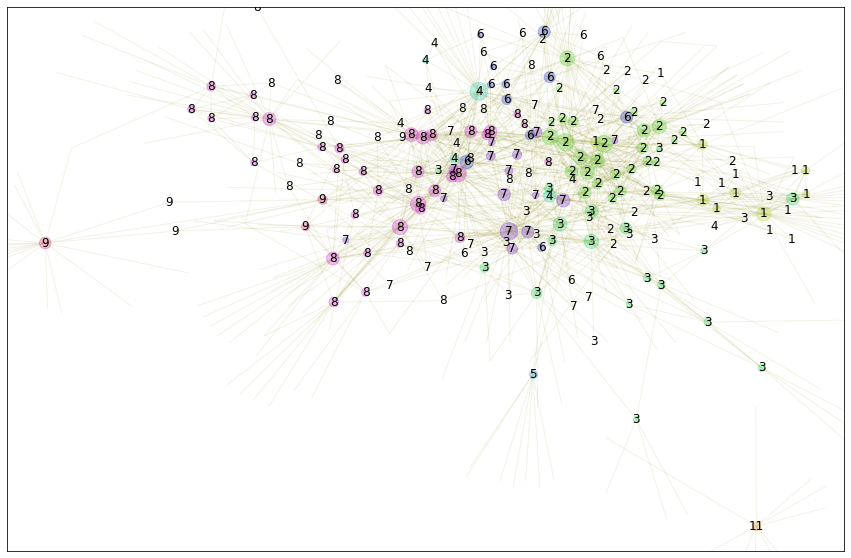

In [67]:
draw_graph_centrality2(G, gnl.mcommunity(G),k = 0.12, fontsize= 0, labels = cluster_labels, node_alpha = 0.3)

De mest sentrale dokumentene basert på _betweenness_

In [23]:
sentral_dok = nb.central_betweenness_characters(G, 10)
mu.printmd('\n\n'.join(["`" + str(round(x[1], 4)) + '`  ' + labels[x[0]] for x in sentral_dok]))
mu.printmd("\n\n--------\n\n")

`0.0972`  194    NOU 1995: 18 Ny lovgivning om opplæring "... og for øvrig kan man gjøre som man vil"

`0.0932`  203    NOU 2000: 14 Frihet med ansvar om høyere utdanning og forskning i Norge

`0.0885`  340    NOU 2009: 18 Rett til læring

`0.0759`  205    NOU 2000: 3 Samisk lærerutdanning - mellom ulike kunnskapstradisjoner

`0.0753`  311    NOU 1988: 28 Med viten og vilje

`0.0686`  298    NOU 1985: 14 Samisk kultur og utdanning

`0.0642`  227    St.meld. nr. 40 (1990—91) Fra visjon til virke Om høgre utdanning

`0.0625`  339    NOU 2008: 3 Sett under ett: ny struktur i høyere utdanning

`0.0616`  174    NOU 1999: 33 Nyttige lærepenger - om utdanningsfinansiering gjennom Lånekassen

`0.0586`  165    NOU 1986: 23 Livslang læring



--------



... og kun sentralitet

In [24]:
sentral_dok = nb.central_characters(G, 10)
mu.printmd('\n\n'.join(["`" + str(round(x[1], 4)) + '`  ' + labels[x[0]] for x in sentral_dok]))
mu.printmd("\n\n--------\n\n")

`0.1043`  203    NOU 2000: 14 Frihet med ansvar om høyere utdanning og forskning i Norge

`0.1043`  194    NOU 1995: 18 Ny lovgivning om opplæring "... og for øvrig kan man gjøre som man vil"

`0.1019`  340    NOU 2009: 18 Rett til læring

`0.0948`  341    NOU 2010: 7 Mangfold og mestring: flerspråklige barn, unge og voksne i opplæringssystemet

`0.09`  174    NOU 1999: 33 Nyttige lærepenger - om utdanningsfinansiering gjennom Lånekassen

`0.0829`  476    NOU 2003: 16 I første rekke: forsterket kvalitet i en grunnopplæring for alle

`0.0806`  227    St.meld. nr. 40 (1990—91) Fra visjon til virke Om høgre utdanning

`0.0782`  311    NOU 1988: 28 Med viten og vilje

`0.0758`  344    NOU 2012: 1 Til barnas beste Ny lovgivning for barnehagene

`0.0687`  347    NOU 2014: 7 Elevenes læring i fremtidens skole Et kunnskapsgrunnlag



--------



### Clustring

Selve clustringen ligger i kommandoen `gnl.community_dict`. Nodene, som er nøkler, erstattes av korresponderende tittel. Hvert cluster er ordnet etter sentralitet, det meste sentrale først.

In [71]:
import json

# Selve clustrene er lagret og hentet frem igjen

In [103]:
#cg = gnl.community_dict(G) # for ny generering når det blir aktuelt

cg = json.load(open('clusters_may_2021.json', encoding = 'utf-8'))
translate = {x:[labels[z] for z in cg[x]] for x in cg}

Overskrift = "## Det er {n}  clustre basert på {d} dokumenter\n\n".format(n = len(cg), d = len(G.nodes()))
rows = '\n\n'.join(["__Cluster "+ str(i + 1) + "__\n\n* " + '\n\n* '.join(translate[x]) for i,x in enumerate(translate)])
mu.printmd(Overskrift + rows)

## Det er 11  clustre basert på 423 dokumenter

__Cluster 1__

* 364    St.meld. nr. 13 (2011–2012) Utdanning for velferd Samspill i praksis

* 391    St.meld. nr. 9 (2016–2017) Fagfolk for fremtiden Fagskoleutdanning

* 377    St.meld. nr. 21 (2016–2017) Lærelyst – tidlig innsats og kvalitet i skolen

* 370    St.meld. nr. 16 (2016–2017) Kultur for kvalitet i høyere utdanning

* 369    St.meld. nr. 16 (2015–2016) Fra utenforskap til ny sjanse Samordnet innsats for voksnes læring

* 374    St.meld. nr. 18 (2014-2015) Konsentrasjon for kvalitet Strukturreform i universitets- og høyskolesektoren

* 346    NOU 2014: 5 MOOC til Norge Nye digitale læringsformer i høyere utdanning

* 390    St.meld. nr. 7 (2014–2015) Langtidsplan for forskning og  høyere utdanning 2015–2024

* 65    St.meld. nr. 12 (2012–2013) Perspektivmeldingen 2013

* 61    NOU 2015: 1 Produktivitet – grunnlag for vekst og velferd Produktivitetskommisjonens første rapport

* 345    NOU 2014: 14 Fagskolen - et attraktivt utdanningsvalg

* 375    St.meld. nr. 19 (2015–2016) Tid for lek og læring - Bedre innhold i barnehagen

* 33    NOU 2011: 14 Bedre integrering: mål, strategier, tiltak: utredning av utvalg oppnevnt ved kongelig resolusjon 30. april 2010

* 62    NOU 2016: 3 Ved et vendepunkt: Fra ressursøkonomi til kunnskapsøkonomi Produktivitetskommisjonens andre rapport

* 89    NOU 2005: 3 Fra stykkevis til helt En sammenhengende helsetjeneste

* 265    St.meld. nr. 22 (2015–2016) Nye folkevalgte regioner – rolle, struktur og oppgaver

* 277    St.meld. nr. 15 (2000-2001) Nasjonale minoritetar i Noreg - Om statleg politikk overfor jødar, kvener, rom, romanifolket og skogfinnar

* 101    St.meld. nr. 25 (2005-2006) Mestring, muligheter og mening. Framtidas omsorgsutfordringer

* 31    NOU 2009: 08 Kompetanseutvikling i barnevernet Kvalifisering til arbeid i barnevernet gjennom praksisnær og forskningsbasert utdanning

* 95    St.meld. nr. 26 (2014-2015) Fremtidens primærhelsetjeneste – nærhet og helhet

* 263    St.meld. nr. 14 (2014-2015) Kommunereformen - nye oppgaver til større kommuner

* 497    St.meld. nr. 11 (2011–2012) Global helse i utenriks- og utviklingspolitikken

* 85    NOU 2013: 2 Hindre for digital verdiskaping

* 93    St.meld. nr. 19 (2014-2015) Folkehelsemeldingen Mestring og muligheter

* 266    St.meld. nr. 27 (2015–2016) Digital agenda for Norge IKT for en enklere hverdag og økt produktivitet

* 450    St.meld. nr. 43 (1999-2000) Om akuttmedisinsk beredskap

* 442    NOU 1998: 9 Hvis det haster..... Faglige krav til akuttmedisinsk beredskap

* 90    NOU 2011: 11 Innovasjon i omsorg

* 18    NOU 2010: 5 Aktiv deltakelse, likeverd og inkludering Et helhetlig hjelpemiddeltilbud

* 39    NOU 2011: 7 Velferd og migrasjon - den norske modellens framtid

* 96    St.meld. nr. 35 (2006-2007) Tilgjengelighet, kompetanse og sosial utjevning Framtidas tannhelsetjenester

* 44    St.meld. nr. 6 (2010–2011) Likestilling for likelønn

* 92    St.meld. nr. 16 (2010–2011) Nasjonal helse- og omsorgsplan (2011–2015)

* 412    St.meld. nr. 9 (2011–2012) Landbruks- og matpolitikken Velkommen til bords

__Cluster 2__

* 340    NOU 2009: 18 Rett til læring

* 341    NOU 2010: 7 Mangfold og mestring: flerspråklige barn, unge og voksne i opplæringssystemet

* 476    NOU 2003: 16 I første rekke: forsterket kvalitet i en grunnopplæring for alle

* 344    NOU 2012: 1 Til barnas beste Ny lovgivning for barnehagene

* 347    NOU 2014: 7 Elevenes læring i fremtidens skole Et kunnskapsgrunnlag

* 348    NOU 2015: 2 Å høre til Virkemidler for et trygt psykososialt miljø

* 488    St.meld. nr. 30 (2003-2004) Kultur for læring

* 368    St.meld. nr. 16 (2006-2007) ... og ingen sto igjen Tidlig innsats for livslang læring

* 349    NOU 2015: 8 Fremtidens skole Fornyelse av fag og kompetanser

* 337    NOU 2007: 6 Formål for framtida: formål for barnehagen og opplæringen

* 363    St.meld. nr. 11 (2008-2009) Læreren  Rollen og utdanningen

* 386    St.meld. nr. 44 (2008-2009) Utdanningslinja

* 371    St.meld. nr. 18 (2010–2011) Læring og fellesskap Tidlig innsats og gode læringsmiljøer for barn,  unge og voksne med særlige behov

* 338    NOU 2008: 18 Fagopplæring for framtida

* 351    NOU 2016: 7 Norge i omstilling - karrierveiledning for individ og samfunn

* 376    St.meld. nr. 20 (2012–2013) På rett vei Kvalitet og mangfold i fellesskolen

* 342    NOU 2010: 8 Med forskertrang og lekelyst: Systematisk pedagogisk tilbud til alle førskolbarn

* 383    St.meld. nr. 31 (2007-2008) Kvalitet i skolen

* 379    St.meld. nr. 23 (2007-2008) Språk bygger broer Språkstimulering og språkopplæring  for barn, unge og voksne

* 378    St.meld. nr. 22 (2010 – 2011) Motivasjon – Mestring – Muligheter Ungdomstrinnet

* 381    St.meld. nr. 28 (2015–2016) Fag – Fordypning – Forståelse En fornyelse av Kunnskapsløftet

* 475    NOU 2002: 10 Førsteklasses fra første klasse: forslag til rammeverk for et nasjonalt kvalitetsvurderingssystem av norsk grunnopplæring

* 350    NOU 2016: 14 Mer å hente Bedre læring for elever med stort læringspotensial

* 97    St.meld. nr. 47 (2008-2009) Samhandlingsreformen Rett behandling – på rett sted – til rett tid

* 60    NOU 2009: 10 Fordelingsutvalget

* 43    St.meld. nr. 6 (2012–2013) En helhetlig integreringspolitikk Mangfold og fellesskap

* 489    St.meld. nr. 33 (2002-2003) Om ressurssituasjonen i grunnopplæringen m.m

* 238    NOU 1996: 1 Et enklere og mer rettferdig inntektssystem for kommuner og fylkeskommuner

* 32    NOU 2009: 22 Det du gjør, gjør det helt bedre samordning av tjenester for utsatte barn og unge

* 385    St.meld. nr. 41 (2008-2009) Kvalitet i barnehagen

* 9    St.meld. nr. 17 (2002–2003) Om statlige tilsyn

* 15    St.meld. nr. 9 (2006–2007) Arbeid, velferd og inkludering

* 362    St.meld nr. 19 (2009–2010) Tid til læring –oppfølging av Tidsbrukutvalgets rapport

* 8    NOU 2004: 5 Arbeidslivslovutvalget Et arbeidsliv for trygghet, inkludering og vekst

* 271    NOU 2000: 22 Om oppgavefordelingen mellom stat, region og kommune

* 281    St.meld. nr. 49 (2003-2004) Mangfold gjennom inkludering og deltakelse Ansvar og frihet

* 13    St.meld. nr. 18 (2007-2008) Arbeidsinnvandring

* 287    NOU 2001: 20 Lov om introduksjonsordning for nyankomne innvandrere - (Introduksjonsloven)

* 83    St.meld. nr. 19 (2008–2009) Ei forvaltning for demokrati og fellesskap

* 100    St.meld. nr. 20 (2006-2007) Nasjonal strategi for å utjevne sosiale helseforskjeller

* 42    NOU 2012: 15 Politikk for likestilling

* 7    NOU 2003: 19 Makt og demokrati

* 68    St.meld. nr. 8 (2004-2005) Perspektivmeldingen 2004 – utfordringer og valgmuligheter for norsk økonomi

* 12    NOU 2009: 7 Om grunnlaget for inntektsoppgjørene 2009

* 24    NOU 2008: 6 Kjønn og lønn — Fakta, analyser og virkemidler for likelønn

* 84    St.meld. nr. 23 (2012-2013) Digital agenda for Norge IKT for vekst og verdiskaping

* 125    NOU 2003: 15 Fra bot til bedring: et mer nyansert og effektivt sanksjonssystem med mindre bruk av straff

* 444    NOU 2001: 22 Fra bruker til borger En strategi for nedbygging av funksjonshemmende barrierer

* 204    NOU 2000: 26 Til et åpent liv i tro og tillit. Dåpsopplæring-tilbakeblikk og utblikk

* 40    NOU 2011: 18 Struktur for likestilling

* 108    NOU 2015: 13 Digital sårbarhet – sikkert samfunn Beskytte enkeltmennesker og samfunn i en digitalisert verden

* 473    NOU 2006: 2 Staten og Den Norske Kirke

* 288    NOU 2005: 18 Fordeling, forenkling, forbedring - Inntektssystemet for kommuner og fylkeskommuner

* 233    St.meld. nr. 7 (2002-2003) Trusopplæring i ei ny tid Om reform av dåpsopplæringa i Den norske kyrkja

* 278    St.meld. nr. 17 (2000-2001) Asyl- og flykningpolitikken i Noreg

* 105    St.meld. nr. 16 (2002–2003) Resept for et sunnere Norge Folkehelsepolitikken

* 120    NOU 1997: 5 Urfolks landrettigheter etter folkerett og utenlandsk rett

* 23    NOU 2000: 12 Barnevernet i Norge - Tilstandsvurderinger, nye perspektiver og forslag til reformer

* 316    NOU 2013: 4 Kulturutredningen 2014

* 88    NOU 2004: 18 Helhet og plan i sosial- og helsetjenestene: samordning og samhandling i kommunale sosial- og helsetjenester

* 70    NOU 1972: 39 Førskoler : en utredning

* 103    St.meld. nr. 34 (2012–2013) Folkehelsemeldingen - God helse - felles ansvar

* 127    NOU 2011: 10 I velferdsstatens venterom: mottakstilbudet for asyløkere

* 27    St.meld. nr. 28 (2004-2005) Om evaluering av maksimalpris i barnehager

* 26    St.meld. nr. 28 (2003-2004) Om søskenmoderasjon i foreldrebetalingen m.m.

* 272    NOU 2004: 17 Statlig tilsyn med kommunesektoren

* 289    St.meld. nr. 12 (2011–2012) Stat og kommune - styring og samspel

* 372    St.meld. nr. 18 (2010–2011) Tidlig innsats og bedre læring for elever med særskilte behov (unntatt kapittel 6)

* 274    NOU 2005: 6 Samspill og tillit Om staten og lokaldemokratiet

* 5    NOU 1999: 14 Forberedelse av inntektsoppgjøret 1999

* 6    NOU 2001: 25 Støtte til livsopphold ved utdanningspermisjon

* 20    St.meld. nr. 27 (1999-2000) Barnehage til beste for barn og foreldre

* 82    St.meld. nr. 17 (2006-2007) Eit informasjonssamfunn for alle

* 25    St.meld. nr. 24 (2002-2003) Barnehagetilbud til alle – økonomi, mangfold og valgfrihet

* 200    St.meld. nr. 35 (1957) Om lærebøkene i skoleverket

* 280    St.meld. nr. 33 (2007-2008) Eit sterkt lokaldemokrati

__Cluster 3__

* 339    NOU 2008: 3 Sett under ett: ny struktur i høyere utdanning

* 186    St.meld. nr. 27 (2000-2001) Gjør din plikt - Krev din rett Kvalitetsreform av høyere utdanning

* 365    St.meld. nr. 14 (2008-2009) Internasjonalisering av utdanning

* 373    St.meld. nr. 18 (2012–2013) Lange linjer  – kunnskap gir muligheter

* 389    St.meld. nr. 7 (2007-2008) Statusrapport for Kvalitetsreformen  i høgre utdanning

* 477    NOU 2003: 25 Ny lov om universiteter og høyskoler

* 490    St.meld. nr. 34 (2001-2002) Kvalitetsreformen Om høyere samisk utdanning og forskning

* 146    NOU 1999: 18 Organisering av oppdragsvirksomhet En vurdering av rammene for oppdragsvirksomhet ved institusjoner innenfor høgre utdanning

* 491    St.meld. nr. 35 (2001-2002) Kvalitetsreformen Om rekruttering til undervisnings- og forskerstillinger i universitets- og høyskolesektoren

* 483    St.meld. nr. 20 (2004-2005) Vilje til forskning

* 226    St.meld. nr. 39 (1998-99) Forskning ved et tidsskille

* 335    NOU 2006: 8 Kunnskap for fellesskapet: Universitetsmuseenes utfordringer

* 367    St.meld. nr. 15 (2007-2008) Tingenes tale Universitetsmuseene

* 343    NOU 2011: 6 Et åpnere forskningssystem

* 14    St.meld. nr. 28 (2007-2008) Om samepolitikken

* 334    NOU 2006: 19 Akademisk frihet: individuelle rettigheter og institusjonelle styringsbehov

* 319    St.meld. nr. 22 (1999-2000) Kjelder til kunnskap og oppleving Om arkiv, bibliotek og museum i ei IKT-tid og om bygningsmessige rammevilkår på kulturområdet

* 253    St.meld. nr. 52 (1992-93) Om norsk samepolitikk

* 382    St.meld. nr. 30 (2008-2009) Klima for forskning

* 276    St.meld. nr. 12 (2006-2007) Regionale fortrinn – regional framtid

* 2    St.meld. nr. 35 (1991-92) Om statens forvaltnings- og personalpolitikk. Fundament for fellesskap

* 479    St.meld. nr. 12 (2003-2004) Om modernisering av Statens lånekasse for utdanning

* 58    NOU 2000: 21 En strategi for sysselsetting og verdiskaping

* 188    St.meld. nr. 36 (1992-1993) Forskning for felleskapet Om forskning

* 454    St.meld. nr. 8 (1998—99) Om handlingsplan for funksjonshemma 1998—2001 Deltaking og likestilling

* 478    St.meld. nr. 11 (2001-2002) Kvalitetsreformen Om vurdering av enkelte unntak fra ny gradsstruktur i høyere utdannning

* 59    NOU 2003: 6 Hva koster det? Bedre budsjettering og regnskapsføring i staten

* 121    NOU 1998: 7 Om stiftelser

* 328    St.meld. nr. 47 (1996-1997) Kunstnarane

* 430    St.meld. nr. 7 (2008-2009) Et nyskapende og bærekraftig Norge

* 295    St.meld. nr. 48 (2002-2003) Kulturpolitikk fram mot 2014

* 128    St.meld. nr. 22 (2008-2009) Svalbard

* 126    NOU 2005: 8 Likeverd og tilgjengelighet : rettslig vern mot diskriminering på grunnlag av nedsatt funksjonsevne : bedret tilgjengelighet for alle

* 439    St.meld. nr. 16 (2008-2009) Nasjonal transportplan 2010–2019

* 331    NOU 1996: 7 Museum: mangfald, minne, møtestad : utgreiing frå eit utval som vart oppnemnt ved kongeleg resolusjon av 15. desember 1993 ; avgjeven til Kulturdepartementet 22. mars 1996

* 130    St.meld. nr. 26 (2003-2004) Om endring av Grunnloven § 100

* 124    NOU 2001: 34 Samiske sedvaner og rettsoppfatninger – bakgrunnsmateriale for Samerettsutvalget

* 416    St.meld. nr. 16 (2004-2005) Leve med kulturminner

* 290    St.meld. nr. 28 (2011–2012) Gode bygg for eit betre samfunn Ein framtidsretta bygningspolitikk

* 431    NOU 2000: 7 Ny giv for nyskaping Vurdering av tiltak for økt FoU i næringslivet

* 443    NOU 1999: 15 Hvor nært skal det være? Tilknytningsformer for offentlige sykehus

* 434    NOU 2012: 9 Energiutredningen - verdiskaping, forsyningssikkerhet og miljø

* 122    NOU 1999: 10 En Bedre organisert politi- og lensmannsetat

* 417    St.meld. nr. 21 (2011–2012) Norsk klimapolitikk

* 207    NOU 2001: 11 Fra innsikt til industri Kommersialisering av forskningsresultater ved universiteter og høgskoler

* 499    St.meld. nr. 20 (2010–2011) Norges deltakelse i Europarådet i 2010

* 461    St.meld. nr. 40 (2002-2003) Nedbygging av funksjonshemmende barrierer Strategier, mål og tiltak i politikken for personer med nedsatt funksjonsevne

* 123    NOU 1999: 27 «Ytringsfrihed bør finde Sted» - Forslag til ny Grunnlov § 100

* 98    NOU 2005: 1 God forskning - bedre helse: lov om medisinsk og helsefaglig forskning, som involverer mennesker, humant biologisk materiale og helseopplysninger (helseforskningsloven) : utredning fra et utvalg oppnevnt ved kongelig resolusjon 6. juni 2003 : avgitt til Helse- og omsorgsdepartementet 21. desember 2004

* 498    St.meld. nr. 13 (2008-2009) Klima, konflikt og kapital - Norsk utviklingspolitikk i et endret handlingsrom

* 273    NOU 2004: 2 Effekter og effektivitet : effekter av statlig innsats for regional utvikling og distriktspolitiske mål

* 501    St.meld. nr. 7 (2011–2012) Nordområdene Visjon og virkemidler

* 411    St.meld. nr. 39 (2008-2009) Klimautfordringene - landbruket en del av løsningen

* 427    St.meld. nr. 18 (1998-99) Bedrifter hvor staten v/Nærings- og handelsdepartementet har eierinteresser

* 418    St.meld. nr. 30 (2002-2003) «Norge digitalt» – et felles fundament for verdiskaping «Norge digitalt» – et felles fundament for verdiskaping

* 500    St.meld. nr. 21 (1999-2000) Menneskeverd i sentrum Handlingsplan for menneskerettigheter

* 296    St.meld. nr. 8 (2007-2008) Kulturell skulesekk for framtida

__Cluster 4__

* 194    NOU 1995: 18 Ny lovgivning om opplæring "... og for øvrig kan man gjøre som man vil"

* 336    NOU 2007: 11 Studieforbund - læring for livet

* 215    St.meld. nr. 20 (2000-2001) Om korte yrkesrettede utdanninger etter videregående opplæring

* 197    NOU 1997: 16 Tilskuddssystemet for private skoler

* 206    NOU 2000: 5 Mellom barken og veden - om fagskoleutdanninger

* 230    St.meld. nr. 45 (1997-98) Om visse endringar i tilskotsordninga for skolar som får statstilskot etter lov om tilskot til private grunnskular og private skular som gjev vidaregåande opplæring

* 11    NOU 1992: 32 Bedre struktur i lovverket: Lovstrukturutvalgets delutredning II

* 56    NOU 1994: 15 Kostnadene ved arbeidstidsavtalen og Reform ’94

* 332    St.meld. nr. 39 (2006-2007) Frivillighet for alle

* 406    NOU 1972: 41 Vaksenopplæring for alle: tilråding frå lovkomitéen om vaksenopplæring. Komitéen oppnemd med Kronprinsregentens resolusjon den 6. mai 1970. Tilråding inngjeven november 1972

* 286    NOU 1992: 20 Det gode arbeidsmiljø er lønnsomt for alle

* 237    NOU 1993: 19 Erfaringene med lov om lønnsplikt under permittering:rapport fra en utredningruppe nedsatt av Kommunaldepartementet juli 1992 ; avgitt til Kommunal- og arbeidsdepartementet 24. februar 1993

* 405    NOU 1976: 39 Folkehøgskolens stilling i skoleverket

* 283    NOU 2006: 7 Det lokale folkestyret i endring?: om deltaking og engasjement i lokalpolitikken : utgreiing frå Lokaldemokratikommisjonen oppnemnt ved kronprinsregentens resolusjon 12. mars 2004 : gjeven til Kommunal- og regionaldepartementet 4. april 2006

* 38    NOU 2006: 13 Fritid med mening: statlig støttepolitikk for frivillige barne- og ungdomsorganisasjoner : utredning fra et offentlig utvalg oppnevnt ved kongelig resolusjon 9. september 2005 : avgitt til Barne- og likestillingsdepartementet 29. juni 2006

* 451    St.meld. nr. 50 (1993-94) Samarbeid og styring. Mål og virkemidler for en bedre helsetjeneste

* 415    St.meld. nr. 13 (1992-93) Om FN-konferansen om miljø og utvikling i Rio de Janeiro

* 134    NOU 1983: 47 Ny fremmedlov

* 440    St.meld. nr. 46 (1999-2000) Nasjonal transportplan 2002-2011

* 333    NOU 2006: 15 Frivillighetsregister: utredning fra en arbeidsgruppe oppnevnt av Kultur- og kirkedepartementet i august 2005 : avgitt 22. juni 2006

* 323    St.meld. nr. 27 (1996-97) Om statens forhold til frivillige organisasjoner

* 133    NOU 1993: 18 Lovgivning om menneskerettigheter: utredning fra et utvalg oppnevnt av Justis- og politidepartementet 18. september 1989 ; avgitt i mai 1993

* 29    St.meld. nr. 53 (1992-93) Om seksuelle overgrep mot barn. Eit overgrep er eit for mykje

* 4    NOU 1991: 8 Lov om statsforetak:en utredning fra et utvalg oppnevnt ved kongelig resolusjon 24. august 1990 ; avgitt til Arbeids- og administrasjonsdepartementet februar 1991

__Cluster 5__

* 487    St.meld. nr. 27 (2004-2005) Om opplæringen innenfor kriminalomsorgen “Enda en vår”

* 119    NOU 1991: 29 Lensmannsetatens oppgaver og organisering:utredning fra et utvalg oppnevnt av Justis- og politidepartementet ved brev av 20. juni 1990 : avgitt til [sic] 27. juni 1991

* 284    St.meld. nr. 23 (2003-2004) Om boligpolitikken

* 117    NOU 1981: 35 Politiets rolle i samfunnet:delutredning I

* 131    St.meld. nr. 27 (1997-98) Om kriminalomsorgen

* 118    NOU 1988: 39 Politi og påtalemyndighet:arbeids- og ansvarsfordeling : utredning fra et utvalg oppnevnt ved kongelig resolusjon av 16. januar 1987 : avgitt til Justis- og politidepartementet november 1988

* 132    NOU 1987: 27 Politiets rolle og oppgaver i samfunnet: delutredning II

* 129    St.meld. nr. 23 (1991-92) Om bekjempelse av kriminalitet

__Cluster 6__

* 228    St.meld. nr. 40 (1992—93) ... vi smaa, en Alen lange; Om 6-åringer i skolen - konsekvenser for skoleløpet og retningslinjer for dets innhold

* 495    St.meld. nr. 54 (1989-90) Om opplæring av barn, unge og voksne med særskilte behov.

* 394    St.meld. nr. 23 (1997—98) Om opplæring for barn, unge og vaksne med særskilde behov Den spesialpedagogiske tiltakskjeda og det statlege støttesystemet

* 223    St.meld. nr. 35 (1990—91) Tillegg til St.meld. nr. 54 (1989—90) Om opplæring av barn, unge og voksne med særskilte behov

* 177    St.meld. nr. 28 (1998-99) Mot rikare mål Om einskapsskolen, det likeverdige opplæringstilbodet og ein nasjonal strategi for vurdering og kvalitetsutvikling i grunnskolen og den vidaregåande opplæringa

* 176    St.meld. nr. 25 (1998-99) Morsmålsopplæring i grunnskolen

* 393    St.meld. nr. 14 (1997-98) Om foreldremedverknad i grunnskolen

* 492    St.meld. nr. 39 (2002-2003) «Ei blot til Lyst» Om kunst og kultur i og i tilknytning til grunnskolen

* 231    St.meld. nr. 47 (1995-96) Om elevvurdering, skolebasert vurdering og nasjonalt vurderingssystem

* 246    St.meld. nr. 23 (1992—93) Om forholdet mellom staten og kommunane

* 401    St.meld. nr. 61 (1984-85) Om visse sider ved spesialundervisninga og den pedagogisk-psykologiske tenesta

* 482    St.meld. nr. 18 (2001-2002) Kvalitetsreformen Om høyere kunstutdanning

* 480    St.meld. nr. 14 (2003-2004) Om opplæringstilbod for hørselshemma

* 163    St.meld. nr. 98 (1976-1977) Om spesialundervisning

* 463    St.meld. nr. 47 (1989-90) Om gjennomføringen av reformer for mennesker med psykisk utviklingshemming

* 22    NOU 1995: 26 Barneombud og barndom i Norge Evaluering av barneombudsordningen og utredning om organiseringsformer for barn og ungdom

* 191    St.meld. nr. 55 (1996–1997) Om skolefritidsordningen

* 469    NOU 1989: 17 Tjenestetilbud til autister

* 156    St.meld. nr. 50 (1980-1981) Om statens skoler for spesialundervisning

* 244    St.meld. nr. 17 (1996-1997) Om innvandring og det flerkulturelle Norge

* 465    St.meld. nr. 88 (1966-67) Om utviklingen av omsorgen for funksjonshemmede

* 28    St.meld. nr. 39 (2001–2002) Om oppvekst og levekår for barn og ungdom i Norge

* 322    St.meld. nr. 27 (1992—93) Tillegg til St.meld. nr. 61 (1991—92) Kultur i tiden

* 419    St.meld. nr. 36 (1990-91) Tilleggsmelding om bioteknologi

* 462    St.meld. nr. 41 (1987-88) Helsepolitikken mot år 2000 Nasjonal helseplan

* 472    NOU 1973: 25 Omsorg for psykisk utviklingshemmede: målsetting og retningslinjer

* 71    NOU 1979: 20 Forsøk med fritidshjem

* 457    NOU 1985: 3 Tiltak for ungdom med atferdsvansker

* 468    NOU 1990: 23 Sykelønnsordningen: utredning fra et utvalg oppnevnt av regjeringen Harlem Brundtland 14. juli 1989 ; avgitt til Sosialdepartementet i augu st 1990

* 464    St.meld. nr. 72 (1984-85) Om barne- og ungdomsvernet

* 456    NOU 1982: 26 Barnemishandling og omsorgssvikt

* 0    NOU 1990: 17 Uførepensjon

* 458    NOU 1986: 4 Samordning i helse- og sosialtjenesten

* 448    St.meld. nr. 34 (1996-97) Resultater og erfaringer fra Regjeringens handlingsplan for funksjonshemmede og veien videre

* 326    St.meld. nr. 41 (1991-92) Idretten - folkebevegelse og folkeforlystelse

* 72    NOU 1984: 20 Framtidig organisering av fritidshjem

* 152    St.meld. nr. 42 (1965-66) Om utbyggingen av spesialskolene

* 239    NOU 1997: 8 Om finansiering av kommunesektoren

* 10    St.meld. nr. 39 (1991-92) Attføring og arbeid for yrkeshemmede. Sykepenger og uførepensjon (Attføringsmeldingen)

* 329    St.meld. nr. 61 (1991-92)  Kultur i tiden

__Cluster 7__

* 203    NOU 2000: 14 Frihet med ansvar om høyere utdanning og forskning i Norge

* 181    St.meld. nr. 42 (1997-98) Kompetansereformen

* 481    St.meld. nr. 16 (2001-2002) Kvalitetsreformen Om ny lærerutdanning Mangforldig - Krevende - relevant

* 179    St.meld. nr. 36 (1998-99) Om prinsipper for dimensjonering av høgre utdanning

* 172    NOU 1997: 25 Ny kompetanse Grunnlaget for en helhetlig etter- og videreutdanningspolitikk

* 180    St.meld. nr. 39 (1997-98) Om dimensjonering av ulike studier innenfor høgre utdanning

* 189    St.meld. nr. 48 (1996-97) Om lærarutdanning

* 175    St.meld. nr. 12 (1999-2000) ... og yrke skal båten bera ... Handlingsplan for rekruttering til læraryrket

* 173    NOU 1999: 17 Realkompetanse i høgre utdanning Dokumentasjon av realkompetanse og etablering av kortere og tilpassede studieløp i høgre utdanning

* 208    NOU 2001: 16 Frihet til mangfold Om folkehøgskolens rammevilkår

* 77    St.meld. nr. 8 (1987-88) Barnehager mot år 2000

* 245    St.meld. nr. 17 (1996-97) Om innvandring og det flerkulturelle Norge

* 190    St.meld. nr. 52 (1996-97) Om økt førskolelærerdekning

* 398    St.meld. nr. 49 (1996-97)  Prinsipp for rangering av søkjarar til studium ved universitet og høgskolar

* 218    St.meld. nr. 26 (1998-99) Økonomien i den statlege høgskolesektoren

* 51    St.meld. nr. 4 (1996-97) Langtidsprogrammet 1998-2001

* 399    St.meld. nr. 51 (1995-96)  Om folkehøgskolen og utdanningssamfunnet

* 407    St.meld. nr. 21 (2000-2001) Styrt val i 4. studieåret i allmennlærarutdanninga

* 309    St.meld.nr. 19 (1986-87) Tillegg til St.meld.nr. 66 (1984-85) "Om høyere utdanning"

* 219    St.meld. nr. 28 (1994—95) Om privatisteksamen innenfor videregående skole

* 395    St.meld. nr. 26 (1995-96) Om privatisteksamen innanfor vidaregåande skole

* 428    St.meld. nr. 38 (1997—98) IT-kompetanse i et regionalt perspektiv

* 446    St.meld. nr. 23 (1996—97) Trygghet og ansvarlighet Om legetjenesten i kommunene og fastlegeordningen

* 270    NOU 1998: 20 Utdanningspermisjon

* 57    NOU 1998: 6 Økonomien i den statlige høgskolesektoren Økonomien i den statlige høgskolesektoren

* 424    NOU 1996: 23 Konkurranse, kompetanse og miljø : næringspolitiske hovedstrategier

* 452    St.meld. nr. 50 (1996-97) Handlingsplan for eldreomsorgen Trygghet — respekt — kvalitet

* 429    St.meld. nr. 41 (1997-98) Næringspolitikk inn i det 21. århundret

* 449    St.meld. nr. 35 (1994-95) Velferdsmeldingen

* 279    St.meld. nr. 18 (1997-98) I tillegg til St meld nr 41 (1995-97) Om norsk samepolitikk

* 47    NOU 1997: 27 Nytte-kostnadsanalyser Prinsipper for lønnsomhetsvurderinger i offentlig sektor

* 55    NOU 1992: 26 En Nasjonal strategi for økt sysselsetting i 1990-årene

* 222    St.meld. nr. 33 (1997-98) Om tilleggspoeng for folkehøgskoleelevar ved opptak til høgre utdanning

* 64    St.meld. nr. 1 (1995-96) Nasjonalbudsjett 1996

* 445    St.meld. nr. 21 (1998—99) Ansvar og meistring Mot ein heilskapleg rehabiliteringspolitikk

* 447    St.meld. nr. 24 (1996-97) Tilgjengelighet og faglighet Om sykehus og annen spesialisthelsetjeneste

* 441    NOU 1997: 6 STATENS FORVALTNINGSTJENESTE STATENS TRYKNING OSLO 1997 Rammevilkår for omsetning av legemidler «Lønnsomme legemidler»

* 248    St.meld. nr. 31 (1996-97) Om distrikts- og regionalpolitikken

__Cluster 8__

* 174    NOU 1999: 33 Nyttige lærepenger - om utdanningsfinansiering gjennom Lånekassen

* 227    St.meld. nr. 40 (1990—91) Fra visjon til virke Om høgre utdanning

* 311    NOU 1988: 28 Med viten og vilje

* 170    NOU 1991: 4 Veien videre : til studie - og yrkeskompetanse for alle

* 225    St.meld. nr. 37 (1990—91) Om organisering og styring i utdanningssektoren

* 220    St.meld. nr. 29 (1994-95) Om prinsipper og retningslinjer for 10-årig grunnskole - ny læreplan

* 165    NOU 1986: 23 Livslang læring

* 314    NOU 1989: 13 Grenseløs læring mottak av utenlandske studenter, studentutveksling og internasjonalisering

* 221    St.meld. nr. 33 (1991-92) Kunnskap og kyndighet Om visse sider ved videregående opplæring

* 229    St.meld. nr. 43 (1988-89) Mer kunnskap til flere

* 184    NOU 1993: 24 Lov om universiteter og høgskoler

* 196    NOU 1996: 22 Lærerutdanning Mellom krav og ideal

* 193    NOU 1995: 12 Opplæring i et flerkulturelt Norge

* 182    NOU 1992: 33 Leve og lære : om utdanningsfinansiering og studentvelferd

* 214    St.meld. nr. 19 (1996-97) Om studier i utlandet

* 178    St.meld. nr. 32 (1998-99) Videregående opplæring

* 210    St.meld. nr. 14 (1993-94) Studiefinansiering og studentvelferd

* 202    NOU 1991: 24 Organisering for helhet og mangfold i norsk forskning

* 301    NOU 1988: 32 For et lærerrikt samfunn

* 232    St.meld. nr. 51 (1988-89) I tillegg til St.meld. nr. 45 for 1987-1988 Om forskning, forsøk og utviklingsarbeid i opplæringa

* 302    St.meld. nr. 19 (1986-87) Tillegg til St.meld. nr. 66 (1984—85) Om høyere utdanning

* 185    St.meld. nr. 24 (1993-94) Om informasjonsteknologi i utdanningen : rapport fra handlingsprogrammet 1990-93 og strategi for videre arbeid

* 151    St.meld. nr. 39 (1983-84) DATATEKNOLOGI I SKOLEN

* 171    NOU 1995: 9 Identitet og dialog Kristendomskunnskap, livssynskunnskap og religionsundervisning

* 195    NOU 1995: 28 Norges teknisk-naturvitenskapelige universitet (NTNU) Forslag til framtidig faglig organisasjon

* 49    St.meld. nr. 4 (1988—89) Langtidsprogrammet 1990—1993

* 183    NOU 1993: 13 Leve og laere: om utdanningsfinansiering og studentvelferd. 2

* 73    NOU 1989: 5 En bedre organisert stat

* 303    St.meld. nr. 28 (1988-1989) Om forskning

* 187    St.meld. nr. 32 (2000-2001) Evaluering av faget Kristendomskunnskap med religions- og livssynsorientering

* 224    St.meld. nr. 37 (1987-88) Om datateknologi i skole og opplæring

* 209    St.meld. nr. 14 (1989-90) Informasjonsteknologi i skole og opplæring

* 21    NOU 1992: 17 Rammeplan for barnehagen

* 493    St.meld. nr. 42 (1989—90) Organisering av informasjonsteknologi i skole og opplæring Tillegg til St.meld. nr 14 (1989-90) Informasjonsteknologi i skole og opplæring

* 139    NOU 1979: 34 Utdanningsfinansiering

* 50    St.meld. nr. 4 (1992-93) Langtidsprogrammet 1994-97

* 397    St.meld. nr. 45 (1987—88) Om forsking, forsøk og utviklingsarbeid i opplæringa

* 211    St.meld. nr. 14 (1995–96) Om kristendomskunnskap med religions og livssynsorientering

* 213    St.meld. nr. 15 (1995-96) Om fag- og timefordelingen i den 10-årige grunnskolen

* 30    NOU 1996: 13 Offentlige overføringer til barnefamilier

* 201    St.meld. nr. 79 (1983-84) Om det pedagogiske utviklingsarbeidet i skolen og om forsøksvirksomheten i skoleverket skoleårene 1981—82 og 1982-83 (FoU-meldingen)

* 254    St.meld. nr. 74 (1979-80) Om invandrere i Norge

* 304    St.meld. nr. 36 (1987-88) Om tilbakebetaling av utdanningslån

* 250    St.meld. nr. 39 (1987-88) Om innvandringspolitikken

* 212    St.meld. nr. 15 (1986-87) Om revisjon av Mønsterplan for grunnskolen

* 484    St.meld. nr. 21 (2002-2003) Kilder til kunnskap Om ny støtteordning gjennom Lånekassen for unge elever i ordinær videregående opplæring

* 164    NOU 1985: 26 Dokumentasjon av kunnskaper og ferdigheter: en utredning om voksnes rett til dokumentasjon i samsvar med Lov om voksenopplæring, § 3

* 460    St.meld. nr. 23 (1977-78) Funksjonshemmede i samfunnet

* 106    NOU 1981: 30 Forskning, teknisk utvikling og industriell innovasjon: en vurdering av den offentlige støtte til teknisk-industriell forskning og utvikling i Norge

* 285    NOU 1990: 13 Forslag til ny lov om kommuner og fylkeskommuner

* 259    NOU 1973: 17 Innvandringspolitikk

* 54    NOU 1995: 11 Statsbankene under endrede rammevilkår: utredning fra et utvalg oppnevnt av kongelig resolusjon 7. oktober 1994 ; avgitt til Finans- og tolldepartementet 29. mars 1995

* 198    St.meld. nr. 22 (1996–97) Om lærlingsituasjonen

* 52    St.meld. nr. 83 (1984-85) Langtidsprogrammet 1986-1989

* 256    NOU 1985: 29 Unge innvandrere i Norge

* 192    NOU 1984: 16 Styrking av norskundervisningen i alle skoleslag

* 486    St.meld. nr. 27 (1998-99) Om innføring av fastrente i Statnes lånekasse for utdanning

* 86    NOU 1985: 35 Utvalget for vurdering av den offentlige forvaltning i det eksportfremmende arbeid

* 470    NOU 1986: 8 Flyktningers tilpasning til det norske samfunn

* 74    St.meld. nr. 69 (1984-85) Om tiltak og virkemidler i likestillingspolitikken

* 305    St.meld. nr. 42 (1987-88) Om u-landsorientert utviklingsforskning

* 80    NOU 1976: 21 Etatsopplæring i staten: delutredning I

* 310    NOU 1984: 3 Frå informasjon til kulturarv: korleis tryggja informasjon frå ulike media for skrift, lyd og bilete til bruk i samtid og framtid? : framlegg til ny pliktavleveringsordning

* 252    St.meld. nr. 45 (1968-69) Om arbeidsmarkedspolitikken

* 471    NOU 1987: 23 Retningslinjer for prioriteringer innen norsk helsetjeneste

* 69    NOU 1985: 22 Akvakultur i Norge: status og framtidsutsikter

* 236    NOU 1979: 44 Nytt inntektssystem for fylkeskommunene: delutredning

* 437    St.meld. nr. 73 (1983-84) Om organiseringen av statens deltagelse i petroleumsvirksomheten

* 147    St.meld. nr. 17 (1973—74) Nordisk samarbeid.

* 153    St.meld. nr. 43 (1984-85) Om voksenopplæring. En del prinsipielle spørsmål og prioriteringer

* 150    St.meld. nr. 38 (1983-84) Om nytt tilskuddssystem for brevundervisning

* 3    NOU 1990: 32 Statens lønnskomité av 1988

* 158    St.meld. nr. 66 (1972-73) Om den videre utbygging og organisering av høgre utdanning

* 307    St.meld. nr. 69 (1981—82) Tillegg til St. meld. nr. 119 (1980—81) Om utviklingen i forskningens organisering og finansiering

* 1    NOU 1991: 26 Om bruk av styrer i statlige virksomheter

* 154    St.meld. nr. 45 (1950) Om behovet for akademisk arbeidskraft

* 159    St.meld. nr. 72 (1980-81) Om lov om voksenopplæring

* 435    St.meld. nr. 19 (1987-88) Tillegg til St.meld. nr. 38 (1986-87) Om Norges framtidige energibruk og -produksjon

* 300    NOU 1987: 35 Samtidens arkiver - fremtidens kildegrunnlag: Arkivverkets presserende oppgaver : rapport fra en arbeidsgruppe nedsatt av Kultur- og vitenskapsdepartementet 27. februar 1986 : avgitt til departementet september 1987

* 217    St.meld. nr. 24 (1995—96) Om organiseringen av Norges teknisk-naturvitenskapelige universitet

* 485    St.meld. nr. 24 (1990-91) Om tilbaketrekking av St.meld. nr.53 (1989-90) om Lærerutdanning ved høgskoler og universitet

* 48    St.meld. nr. 3 (1987-88): Statsrekneskapen medrekna folketrygda for budsjettermi nen 1987

* 46    St.meld. nr. 36 (1984-85) Om enkelte hovedspørsmål i norsk utviklingshjelp

* 433    NOU 1972: 38 Stortingets kontroll med forvaltningen m.v: utredning

* 162    St.meld. nr. 91 (1969—70) Om reform av gymnaset og forsøk med utbygging av det videregående skoleverk.

* 257    NOU 1988: 38 Nye mål og retningslinjer for reformer i lokalforvaltningen: utredning fra Hovedkomiteen for lokalforvaltningen oppnevnt ved kongelig resolusjon 12. juni 1985 : avgitt til Kommunal- og arbeidsdepartementet 3. november 1988

* 240    St.meld. nr. 107 (1975-76) Om innvandringsstoppen og arbeidet med innvandringsspørsmålet

* 249    St.meld. nr. 39 (1973-74) Om innvandringspolitikken

* 410    St.meld. nr. 9 (1987-88) Om landbruksfagskolenes struktur og plass i skolesystemet

* 107    NOU 1981: 30B Vedlegg til utredning om offentlig støtte til teknisk industriell forskning og utvikling i Norge

* 420    St.meld. nr. 49 (1986-87) Om miljøvernforskning

* 143    NOU 1981: 7 Skolebibliotektjenesten

* 255    St.meld. nr. 85 (1982-83) Om sysselsettingen og arbeidsmarkedspolitikken

* 258    NOU 1982: 15 Nytt inntektssystem for kommunene: delutredning

* 81    NOU 1979: 21 Etatsopplæring i staten: Delutredning 2

* 453    St.meld. nr. 50 (1998-99) Utjamningsmeldinga. Om fordeling av inntekt og levekår i Noreg

* 306    St.meld. nr. 44 (1987—88) Om utviding av fjernsynstilbodet i Noreg

* 242    St.meld. nr. 14 (1977-78) Om sysselsettingspolitikken

* 161    St.meld. nr. 91 (1961-62) Om den videre utbygging av universiteter og høgskoler

* 87    St.meld. nr. 36 (1985—86) Om skipsfartspolitikken

* 140    NOU 1981: 37 Om skolemiljøet

* 502    NOU 1985: 12 Norges offisielle kultursamarbeid med utlandet: utredning

* 466    NOU 1986: 25 Folketrygdens finansiering av tannhelsearbeid

* 66    St.meld. nr. 25 (1973-74) Petroleumsvirksomhetens plass i det norske samfunn

* 75    St.meld. nr. 7 (1986-87) Statlige utvalg, styrer og råd, m.v. I.januar - 31.desember 1986.

* 494    St.meld. nr. 53 (1989-90) Lærerutdanning ved høyskoler og universitet

* 169    NOU 1983: 17 Universitets- og forskningsbibliotekene i Norge

* 438    NOU 1983: 32 Telematikk : Teleutvalgets utredning II : delutredning

* 79    NOU 1980: 7 Demokrati og politiske ressurser

__Cluster 9__

* 298    NOU 1985: 14 Samisk kultur og utdanning

* 205    NOU 2000: 3 Samisk lærerutdanning - mellom ulike kunnskapstradisjoner

* 432    St.meld. nr. 53 (1988-89) Om næringspolitikk

* 167    NOU 1980: 59 Samisk i grunnskolen

* 135    NOU 1984: 18 Om samenes rettsstilling

* 251    St.meld. nr. 41 (1996-97) Om norsk samepolitikk

* 144    NOU 1982: 27 Funksjonsfordeling og administrasjonsordninger

* 455    NOU 1995: 6 Plan for helse- og sosialtjenester til den samiske befolkning i Norge

* 299    NOU 1987: 34 Samisk kultur og utdanning: de enkelte sektorer, administrasjon

* 136    NOU 1975: 37 Videregående opplæring for samer

* 78    NOU 1976: 46 Utdanning og ulikhet

* 421    NOU 1978: 18A Finnmarksvidda: natur - kultur

* 149    St.meld. nr. 21 (1962-63) Om kulturelle og økonomiske tiltak av særlig interesse for den samisktalende befolkning

* 76    St.meld. nr. 79 (1979-80) Regnskap for reguleringsfondene etter prisloven 1. januar - 31. desember 1979

* 467    NOU 1980: 53 Vern av urbefolkninger: kan og bør Norge ratifisere ILO-konvensjon nr. 107 og slutte seg til rekommendasjon nr. 104 om vern og integrering av urbefolkninger som helt eller delvis lever under stammeforhold i uavhengige land?

* 408    St.meld. nr. 13 (1974-75) Om en aksjonsplan for de sentrale samiske bosettingsområder

* 436    St.meld. nr. 61 (1979-80) Om regjeringens arbeid med gjennomføringen av Stortingets vedtak om utbyggingen av Altavassdraget

* 413    NOU 1978: 18B Bruken av Finnmarksvidda

* 241    St.meld. nr. 108 (1972-73) Om et utbyggingsprogram for Nord-Norge

* 155    St.meld. nr. 46 (1971-72) Om Mønsterplan for grunnskolen

* 423    NOU 1972: 33 Om landsdelsplan for Nord-Norge: forslag til plan for utvikling av landsdelen

* 313    NOU 1983: 6 Stadnamn

* 402    St.meld. nr. 8 (1973-74) Om organisering og finansiering av kulturarbeid

* 422    NOU 1982: 36 Kulturminnevernet: organisasjonsspørsmål innenfor kulturminnevernet i Norge

__Cluster 10__

* 216    St.meld. nr. 21 (1996—97) Finansiering av lærebøker for 2. - 10. klassetrinn og status for tilrettelegging av skolelokaler til seksåringer i forbindelse med Reform 97

* 53    NOU 1995: 13 Kostnader ved skolestart for seksåringer: utredning fra et utvalg oppnevnt ved kongelig resolusjon 6. mai 1994 ; avgitt til Finans- og tolldepartementet 7. april 1995

__Cluster 11__

* 320    St.meld. nr. 24 (1994—95) Nærkringkasting

* 321    St.meld. nr. 26 (1991-92) Kringkasting og dagspresse 1990 m.v.

* 312    NOU 1984: 5 Kringkastingsreklame: forslag til finansiering av et utvidet kringkastingstilbud

* 315    NOU 1995: 3 Mangfold i media: om eierkonsentrasjon i massemedia : utredning fra Eierskapsutvalget oppnevnt ved kongelig resolusjon 29. oktober 1993 ; avgitt til Kulturdepartementet 21. februar 1995

* 308    St.meld. nr. 88 (1981-82) Om medieutvikling og nye kringkastingsformer

* 330    NOU 1992: 14 Mål og midler i pressepolitikken: utredning fra et utvalg oppnevnt ved kongelig resolusjon 15. februar 1991 ; avgitt til Kulturdepartementet 5. mai 1992

* 325    St.meld. nr. 39 (1990-91) Virksomheten i Norsk rikskringkasting m.v.

* 324    St.meld. nr. 32 (1992-93) Media i tida

* 297    NOU 1982: 33 Nærradio

* 137    NOU 1975: 7 Kringkastingslov

* 327    St.meld. nr. 42 (1993-94) Kringkasting og dagspresse 1993 m.v.

In [26]:
import json

In [27]:
#json.dump(cg, open('clusters_may_2021.json','w', encoding = 'utf-8'))

In [74]:
for i in cg:
    print(i, len(cg[i]))

VFE2E59A-J7JUTEAB 34
V4RID8TN-3N9XWYFJ 76
HLGK973Q-2CAC6487 57
3ETZFFNS-7WSWWYHM 24
CEDN8EB5-RZQZTZRG 8
DNXZWQYC-33CHN65F 40
JQNL2KII-C4J4FFM6 38
PY7VZARY-3SN7EBSL 109
97Z5KABU-YKFJBKEF 24
A4ZPDKMT-CC5FSKP9 2
ERW4A5K3-U8TX647F 11


VFE2E59A-DN3YBFQM 40
V4RID8TN-3N9XWYFJ 82
JQNL2KII-HLGK973Q 77
3ETZFFNS-33CHN65F 46
CEDN8EB5-3SSXIPXK 8
3SN7EBSL-RTTHJN6V 56
PY7VZARY-GVLDYG9U 45
97Z5KABU-YKFJBKEF 24
A4ZPDKMT-CC5FSKP9 2
HL2YSKU9-B6876BD4 32
ERW4A5K3-298BNUC8 11

VFE2E59A-J7JUTEAB 34
V4RID8TN-3N9XWYFJ 76
HLGK973Q-2CAC6487 57
3ETZFFNS-7WSWWYHM 24
CEDN8EB5-RZQZTZRG 8
DNXZWQYC-33CHN65F 40
JQNL2KII-C4J4FFM6 38
PY7VZARY-3SN7EBSL 109
97Z5KABU-YKFJBKEF 24
A4ZPDKMT-CC5FSKP9 2
ERW4A5K3-U8TX647F 11

In [76]:
tot = co.nbtotals()

In [77]:
cg.keys()

dict_keys(['VFE2E59A-J7JUTEAB', 'V4RID8TN-3N9XWYFJ', 'HLGK973Q-2CAC6487', '3ETZFFNS-7WSWWYHM', 'CEDN8EB5-RZQZTZRG', 'DNXZWQYC-33CHN65F', 'JQNL2KII-C4J4FFM6', 'PY7VZARY-3SN7EBSL', '97Z5KABU-YKFJBKEF', 'A4ZPDKMT-CC5FSKP9', 'ERW4A5K3-U8TX647F'])

In [78]:
dtm = pd.concat([co.corpus_text(cg[x], columns = x) for x in cg], axis = 1)

In [79]:
dtm_totals = dtm.sum()

# Stolpediagram indeksert med zotero ID 

Basert på antall ord

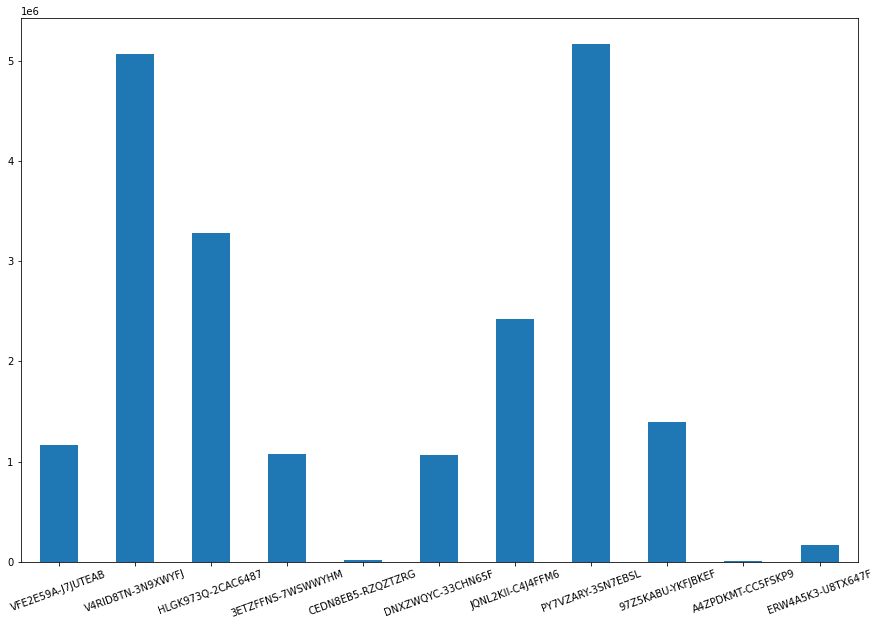

In [80]:
dtm_totals.plot(kind = 'bar', rot=20)

# Antall dokument

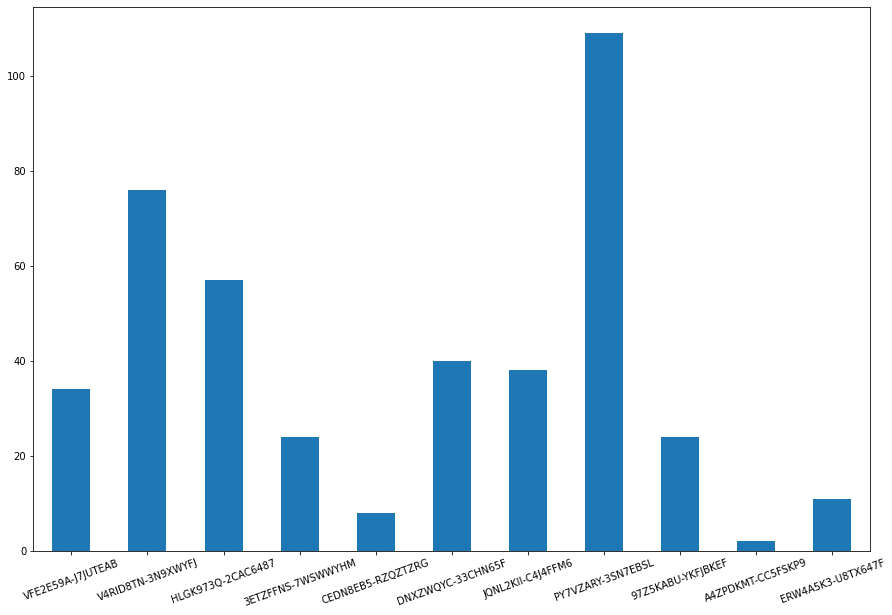

In [88]:
nb.frame(cg).transpose().count().plot(kind='bar', rot = 20)

In [91]:
nums = dict(list(enumerate(cg)))

In [95]:
ng = {i+1:cg[nums[i]] for i in nums}

# Stolpediagram med clusternummer

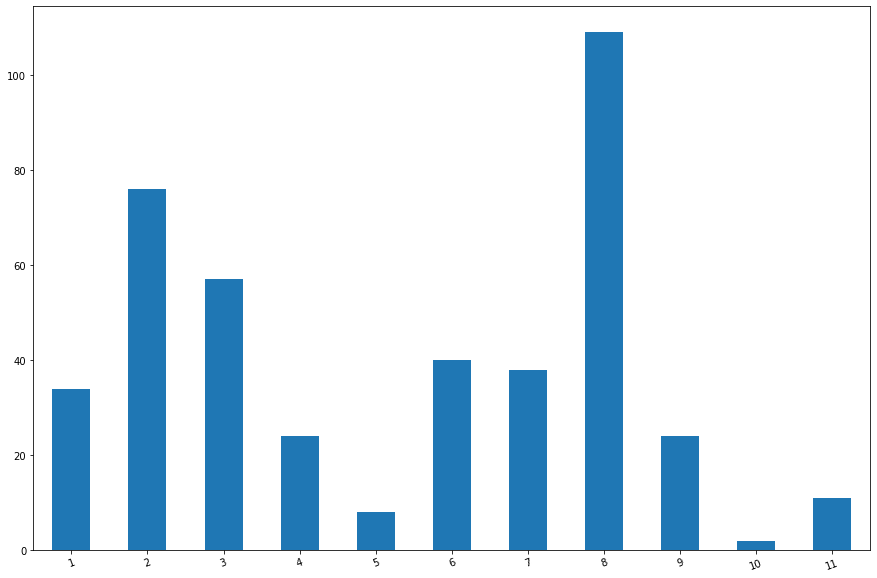

In [96]:
nb.frame(ng).transpose().count().plot(kind='bar', rot = 20)

In [44]:
def check(dictionary, val, default = -1):
    if val in dictionary:
        res = dictionary[val]
    else:
        res = default
    return res
        

In [45]:
list(map(lambda x: check(cluster_numbers,x) , cg.keys()))

[-1, -1, -1, ['5'], -1, -1, -1, ['7'], -1, -1, -1]

# Sjekk med nøkkelord - frekvenser 

In [414]:
groupings = {'norsk': "norsk norske Norsk Norske".split(),
            'finsk': "finsk finske Finsk Finske".split(),
            'svensk': "svensk svenske Svensk Svenske".split(),
            'dansk': 'dansk danske Dansk Danske'.split(),
            'nordisk': 'nordisk nordiske Nordisk Nordiske'.split(),
            'Norge': 'norge Norge'.split(),
            'Sverige': 'sverige Norge'.split(),
            'Danmark': 'danmark Danmark'.split(),
            'Finland': 'finland Finland'.split()}

In [415]:
groupings_inv = {x:i for i in groupings for x in groupings[i]}

In [416]:
groupings_inv

{'norsk': 'norsk',
 'norske': 'norsk',
 'Norsk': 'norsk',
 'Norske': 'norsk',
 'finsk': 'finsk',
 'finske': 'finsk',
 'Finsk': 'finsk',
 'Finske': 'finsk',
 'svensk': 'svensk',
 'svenske': 'svensk',
 'Svensk': 'svensk',
 'Svenske': 'svensk',
 'dansk': 'dansk',
 'danske': 'dansk',
 'Dansk': 'dansk',
 'Danske': 'dansk',
 'nordisk': 'nordisk',
 'nordiske': 'nordisk',
 'Nordisk': 'nordisk',
 'Nordiske': 'nordisk',
 'norge': 'Norge',
 'Norge': 'Sverige',
 'sverige': 'Sverige',
 'danmark': 'Danmark',
 'Danmark': 'Danmark',
 'finland': 'Finland',
 'Finland': 'Finland'}

In [345]:
norden = "norsk norske finsk finske svensk svenske dansk danske norden nordisk nordiske".split()
norden += [x.capitalize() for x in norden]

In [346]:
norden

['norsk',
 'norske',
 'finsk',
 'finske',
 'svensk',
 'svenske',
 'norden',
 'nordisk',
 'nordiske',
 'Norsk',
 'Norske',
 'Finsk',
 'Finske',
 'Svensk',
 'Svenske',
 'Norden',
 'Nordisk',
 'Nordiske']

In [347]:
dtm.sum(axis = 1).sort_values(ascending = False).head(50)

.         902503.0
,         662247.0
og        651972.0
i         577208.0
av        367158.0
for       364613.0
til       331140.0
er        294600.0
som       287063.0
å         258153.0
det       236048.0
at        223064.0
en        205407.0
med       185037.0
på        174240.0
har       158838.0
de        139680.0
-         135070.0
om        132715.0
)         111885.0
den       107608.0
et        103932.0
(         103199.0
kan        98150.0
:          93394.0
vil        89724.0
Det        84298.0
ikke       79171.0
fra        72143.0
skal       67121.0
I          63973.0
eller      62654.0
ved        61497.0
også       55040.0
være       50649.0
må         43489.0
dette      42284.0
seg        41239.0
mellom     41049.0
andre      40790.0
»          38984.0
«          38590.0
/          35536.0
etter      34899.0
år         34380.0
Dette      31784.0
enn        30341.0
blir       29269.0
ble        29080.0
mer        29005.0
dtype: float64

In [393]:
(dtm.loc[[x for x in groupings_inv if x in dtm.index]]*1).fillna(0).astype(int).style.background_gradient(axis = 1)

,1,2,3,4,5,6,7,8,9,10,11
norsk,770,3491,2542,351,9,516,1891,3568,1559,0,25
norske,1104,3843,2385,393,9,417,2221,2973,1620,0,41
Norsk,147,605,863,384,0,499,454,2606,798,0,121
Norske,65,265,299,63,0,109,142,744,280,0,23
finsk,1,74,21,15,2,11,27,105,233,0,5
finske,6,87,43,12,4,24,42,57,182,0,13
Finsk,0,8,2,1,1,0,2,13,4,0,0
Finske,0,4,3,0,0,2,2,1,1,0,0
svensk,11,85,45,24,2,11,34,116,166,0,12
svenske,25,223,94,102,1,40,113,318,243,0,32


In [348]:
(dtm.loc[[x for x in norden if x in dtm.index]]*1000/dtm.sum()).fillna(0).style.set_precision(2).background_gradient(axis = 1)

,1,2,3,4,5,6,7,8,9,10,11
norsk,0.66,0.69,0.77,0.33,0.61,0.49,0.78,0.69,1.11,0.00,0.15
norske,0.95,0.76,0.73,0.37,0.61,0.39,0.92,0.58,1.16,0.00,0.25
finsk,0.00,0.01,0.01,0.01,0.14,0.01,0.01,0.02,0.17,0.00,0.03
finske,0.01,0.02,0.01,0.01,0.27,0.02,0.02,0.01,0.13,0.00,0.08
svensk,0.01,0.02,0.01,0.02,0.14,0.01,0.01,0.02,0.12,0.00,0.07
svenske,0.02,0.04,0.03,0.10,0.07,0.04,0.05,0.06,0.17,0.00,0.19
norden,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
nordisk,0.02,0.03,0.06,0.04,0.00,0.05,0.02,0.08,0.19,0.00,0.00
nordiske,0.15,0.09,0.12,0.08,0.34,0.12,0.09,0.19,0.25,0.00,0.07
Norsk,0.13,0.12,0.26,0.36,0.00,0.47,0.19,0.50,0.57,0.00,0.73


In [110]:
#nb.normalize_corpus_dataframe(dtm)

In [111]:
ppt_ord = """Grunnlov
Formål
Normer
Verdier
Rettigheter
Flerkulturell
Mangfold
mangfoldig
Religion
Tospråklige
Skole
Skoleeier
Oppgavefordeling
Undervisning
Ledelse
""".split()
ppt_ord += [x.lower() for x in ppt_ord]
ppt_ord = list(set(ppt_ord))

# Frekvenser

Her er det frekvensene som gjelder

Først litt kode for å koble kolonnene til indekser. I utgangspunktet skal det bare være å gi dem numre fra 1 og oppover, men for å være på den sikre siden, kobles de til zotero-indeksene.

In [119]:
keys_invert = {k:i for i,k in enumerate(cg)}

In [120]:
keys_invert

{'VFE2E59A-J7JUTEAB': 0,
 'V4RID8TN-3N9XWYFJ': 1,
 'HLGK973Q-2CAC6487': 2,
 '3ETZFFNS-7WSWWYHM': 3,
 'CEDN8EB5-RZQZTZRG': 4,
 'DNXZWQYC-33CHN65F': 5,
 'JQNL2KII-C4J4FFM6': 6,
 'PY7VZARY-3SN7EBSL': 7,
 '97Z5KABU-YKFJBKEF': 8,
 'A4ZPDKMT-CC5FSKP9': 9,
 'ERW4A5K3-U8TX647F': 10}

In [123]:
colnum = list(map(lambda x: keys_invert[x] + 1, dtm.columns))
colnum

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]

Nå blir kolonnenumrene tilsvarende de som gjelder for de andre visualiseringene.

In [124]:
dtm.columns = colnum

In [395]:
nordiske_land = "Norge Sverige Danmark Finland Norden".split()

In [430]:
nordisk_df = pd.DataFrame(columns=dtm.columns)


In [431]:
for i in groupings:
    nordisk_df.loc[i] = dtm.loc[groupings[i]].sum()

In [432]:
nordisk_df.fillna(0).astype(int).style.background_gradient(axis = 1)

,1,2,3,4,5,6,7,8,9,10,11
norsk,2086,8204,6089,1191,18,1541,4708,9891,4257,0,210
finsk,7,173,69,28,7,37,73,176,420,0,18
svensk,40,333,146,137,3,56,155,460,480,0,51
dansk,80,283,147,66,3,57,104,249,108,0,21
nordisk,215,746,901,165,7,242,375,2025,1358,0,22
Norge,2782,5587,4983,573,8,870,3445,4557,1561,0,139
Sverige,2781,5584,4983,573,8,869,3445,4557,1560,0,139
Danmark,245,542,381,97,5,108,336,471,48,0,48
Finland,83,387,511,64,4,75,251,290,436,0,33


In [425]:
['Norwegian', 'Finnish', 'Swedish', 'Danish', 'Nordic', 'Norway', 'Sweden',
        'Denmark', 'Finland']

In [433]:
(nordisk_df*1000/dtm.sum()).fillna(0).style.set_precision(2).background_gradient(axis = 1)

,1,2,3,4,5,6,7,8,9,10,11
norsk,1.79,1.62,1.86,1.11,1.22,1.45,1.94,1.91,3.04,0.00,1.26
finsk,0.01,0.03,0.02,0.03,0.47,0.03,0.03,0.03,0.30,0.00,0.11
svensk,0.03,0.07,0.04,0.13,0.20,0.05,0.06,0.09,0.34,0.00,0.31
dansk,0.07,0.06,0.04,0.06,0.20,0.05,0.04,0.05,0.08,0.00,0.13
nordisk,0.18,0.15,0.27,0.15,0.47,0.23,0.15,0.39,0.97,0.00,0.13
Norge,2.38,1.10,1.52,0.53,0.54,0.82,1.42,0.88,1.12,0.00,0.83
Sverige,2.38,1.10,1.52,0.53,0.54,0.82,1.42,0.88,1.11,0.00,0.83
Danmark,0.21,0.11,0.12,0.09,0.34,0.10,0.14,0.09,0.03,0.00,0.29
Finland,0.07,0.08,0.16,0.06,0.27,0.07,0.10,0.06,0.31,0.00,0.20


In [394]:

(dtm.loc[[x for x in norden + nordiske_land if x in dtm.index]]*1).fillna(0).astype(int).style.background_gradient(axis = 1)

,1,2,3,4,5,6,7,8,9,10,11
norsk,770,3491,2542,351,9,516,1891,3568,1559,0,25
norske,1104,3843,2385,393,9,417,2221,2973,1620,0,41
finsk,1,74,21,15,2,11,27,105,233,0,5
finske,6,87,43,12,4,24,42,57,182,0,13
svensk,11,85,45,24,2,11,34,116,166,0,12
svenske,25,223,94,102,1,40,113,318,243,0,32
norden,0,1,0,1,0,0,2,1,1,0,0
nordisk,21,132,195,38,0,57,54,400,261,0,0
nordiske,171,469,409,83,5,130,222,961,349,0,12
Norsk,147,605,863,384,0,499,454,2606,798,0,121


In [396]:
(dtm.loc[[x for x in norden + nordiske_land if x in dtm.index]]*1000/dtm.sum()).fillna(0).style.set_precision(2).background_gradient(axis = 1)

,1,2,3,4,5,6,7,8,9,10,11
norsk,0.66,0.69,0.77,0.33,0.61,0.49,0.78,0.69,1.11,0.00,0.15
norske,0.95,0.76,0.73,0.37,0.61,0.39,0.92,0.58,1.16,0.00,0.25
finsk,0.00,0.01,0.01,0.01,0.14,0.01,0.01,0.02,0.17,0.00,0.03
finske,0.01,0.02,0.01,0.01,0.27,0.02,0.02,0.01,0.13,0.00,0.08
svensk,0.01,0.02,0.01,0.02,0.14,0.01,0.01,0.02,0.12,0.00,0.07
svenske,0.02,0.04,0.03,0.10,0.07,0.04,0.05,0.06,0.17,0.00,0.19
norden,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
nordisk,0.02,0.03,0.06,0.04,0.00,0.05,0.02,0.08,0.19,0.00,0.00
nordiske,0.15,0.09,0.12,0.08,0.34,0.12,0.09,0.19,0.25,0.00,0.07
Norsk,0.13,0.12,0.26,0.36,0.00,0.47,0.19,0.50,0.57,0.00,0.73


In [127]:
(dtm.loc[[x for x in "opplæring tilpasset grunnloven grunnlov rettigheter spesialundervisning".split() if x in dtm.index]]*1).fillna(0).astype(int).style.background_gradient(axis = 1)

,1,2,3,4,5,6,7,8,9,10,11
opplæring,644,6604,607,2505,152,1711,1492,4347,399,0,13
tilpasset,168,1229,270,132,19,177,291,499,109,12,9
grunnloven,0,39,26,20,1,0,4,5,147,0,0
grunnlov,0,11,12,10,0,5,3,9,89,0,0
rettigheter,245,1394,943,361,5,99,182,348,947,0,3
spesialundervisning,23,741,6,325,2,382,16,101,1,0,0


In [168]:
(dtm.loc[[x for x in "opplæring tilpasset grunnloven grunnlov rettigheter spesialundervisning".split() if x in dtm.index]]*100/dtm.sum()).fillna(0).style.set_precision(2).background_gradient(axis = 1)

,1,2,3,4,5,6,7,8,9,10,11
opplæring,0.06,0.13,0.02,0.23,1.03,0.16,0.06,0.08,0.03,0.00,0.01
tilpasset,0.01,0.02,0.01,0.01,0.13,0.02,0.01,0.01,0.01,0.10,0.01
grunnloven,0.00,0.00,0.00,0.00,0.01,0.00,0.00,0.00,0.01,0.00,0.00
grunnlov,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.01,0.00,0.00
rettigheter,0.02,0.03,0.03,0.03,0.03,0.01,0.01,0.01,0.07,0.00,0.00
spesialundervisning,0.00,0.01,0.00,0.03,0.01,0.04,0.00,0.00,0.00,0.00,0.00


In [141]:
(dtm.loc[[x for x in "FN UNESCO IEA OECD TIMSS PISA PIRLS".split() if x in dtm.index]]).fillna(0).astype(int).style.background_gradient(axis = 1)

,1,2,3,4,5,6,7,8,9,10,11
FN,28,43,121,4,0,11,32,38,238,0,0
UNESCO,8,31,44,10,0,16,19,121,16,0,0
IEA,17,32,4,0,0,3,0,2,0,0,0
OECD,516,684,650,25,0,40,430,256,4,0,2
TIMSS,18,65,1,0,0,5,0,0,0,0,0
PISA,32,150,0,0,0,12,2,0,0,0,0
PIRLS,4,73,0,0,0,2,0,0,0,0,0


In [171]:
(dtm.loc[[x for x in "FN UNESCO IEA OECD TIMSS PISA PIRLS".split() if x in dtm.index]]*1000/dtm.sum()).fillna(0).style.set_precision(2).background_gradient(axis = 1
                                                                                                                                       )

,1,2,3,4,5,6,7,8,9,10,11
FN,0.02,0.01,0.04,0.00,0.00,0.01,0.01,0.01,0.17,0.00,0.00
UNESCO,0.01,0.01,0.01,0.01,0.00,0.02,0.01,0.02,0.01,0.00,0.00
IEA,0.01,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
OECD,0.44,0.13,0.20,0.02,0.00,0.04,0.18,0.05,0.00,0.00,0.01
TIMSS,0.02,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
PISA,0.03,0.03,0.00,0.00,0.00,0.01,0.00,0.00,0.00,0.00,0.00
PIRLS,0.00,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


## Cluster og viktige ord

In [131]:
mu.printmd( "## De viktigste ordene i hvert cluster\n\n".format(n = len(cg), d = len(G.nodes())))


for x in cg:
    #mu.printmd(x)
    translate = [labels[z] for z in cg[x][:10]]
    mu.printmd('### Topp rapporter')
    mu.printmd(', '.join(translate))
    mu.printmd('\n\n')
    rows = ', '.join(
        (
            co.corpus_text(cg[x])['freq']/tot['tot']
        ).sort_values(
            ascending = False
        )[:130].index
    )
    mu.printmd('#### Viktigste ord')
    mu.printmd(rows)



## De viktigste ordene i hvert cluster



### Topp rapporter

364    St.meld. nr. 13 (2011–2012) Utdanning for velferd Samspill i praksis, 391    St.meld. nr. 9 (2016–2017) Fagfolk for fremtiden Fagskoleutdanning, 377    St.meld. nr. 21 (2016–2017) Lærelyst – tidlig innsats og kvalitet i skolen, 370    St.meld. nr. 16 (2016–2017) Kultur for kvalitet i høyere utdanning, 369    St.meld. nr. 16 (2015–2016) Fra utenforskap til ny sjanse Samordnet innsats for voksnes læring, 374    St.meld. nr. 18 (2014-2015) Konsentrasjon for kvalitet Strukturreform i universitets- og høyskolesektoren, 346    NOU 2014: 5 MOOC til Norge Nye digitale læringsformer i høyere utdanning, 390    St.meld. nr. 7 (2014–2015) Langtidsplan for forskning og  høyere utdanning 2015–2024, 65    St.meld. nr. 12 (2012–2013) Perspektivmeldingen 2013, 61    NOU 2015: 1 Produktivitet – grunnlag for vekst og velferd Produktivitetskommisjonens første rapport

#### Viktigste ord

2016, utdan-, 2014, Meld, 2015, Velferd, 2013, omsorgstjenesten, stu-, fagskoler, 2060, migrasjon, Kunnskapsdepartementet, Hindre, produktivitetsvekst, utdanningene, nester, omsorgstjenestene, Fagfolk, velferds-, 2017, Fastlands-Norge, tje, omsorgstjenester, høyskolene, kommu-, 2012, nale, omsorgsdepartementet, Mestring, 2015., kunn-, botid, finanskrisen, vandrere, vel-, digitalisering, Fremtidens, velferdsordninger, produk, omsorgssektoren, dringer, sosialfaglig, innvandrerforeldre, lønnstilskudd, referansebanen, Immigration, finanser, kompetanse-, Innvandrere, kvalitetsutvikling, insentiver, ningene, spesialisthelsetjenesten, virk, fastlegeordningen, OECD-land, EU-land, hjemmetjenester, kvalitets-, kompetansebehov, 2011, befolk-, fag-, norskfødte, utdanningsvalg, Sentral-, innvandrergrupper, utdanninger, immigrants, EØS-land, gjel-, miske, informa-, tjenes, helseforetakene, blemer, omsorgsboliger, innvandreres, yrkesdeltakelse, behand-, høyskoler, helseforetak, pensjonsfond, studiepoeng, nomi, tivt, serte, helse-, lavinntekt, læringsutbytte, oljeinntekter, omsorgs-, stykkevis, nødven-, pri-, videre-, Innvandring, høy-, Boks, innvandringspolitikk, 2035, 1408, kere, Fafo-rapport, fastlegen, toren, arbeidstilbudet, NAV, sko-, 2050, habilitering, strekkelig, framvoksende, fastlege, tjenestenes, grup-, vik-, res-, bru-, korttidsopphold, helsetjenestene, mulig-, lønnsdannelsen, mastergrad, pst., 2030, vendepunkt, syk-, somheten

### Topp rapporter

340    NOU 2009: 18 Rett til læring, 341    NOU 2010: 7 Mangfold og mestring: flerspråklige barn, unge og voksne i opplæringssystemet, 476    NOU 2003: 16 I første rekke: forsterket kvalitet i en grunnopplæring for alle, 344    NOU 2012: 1 Til barnas beste Ny lovgivning for barnehagene, 347    NOU 2014: 7 Elevenes læring i fremtidens skole Et kunnskapsgrunnlag, 348    NOU 2015: 2 Å høre til Virkemidler for et trygt psykososialt miljø, 488    St.meld. nr. 30 (2003-2004) Kultur for læring, 368    St.meld. nr. 16 (2006-2007) ... og ingen sto igjen Tidlig innsats for livslang læring, 349    NOU 2015: 8 Fremtidens skole Fornyelse av fag og kompetanser, 337    NOU 2007: 6 Formål for framtida: formål for barnehagen og opplæringen

#### Viktigste ord

grunnopplæringen, oppgavefordelingen, Mangfold, funksjonsnedsettelser, 2016, utdan-, skoleeier, yrkesopplæringen, opplæringsloven, likelønn, fyl, maksimalpris, Kunnskapsdepartementet, minoritetsspråklige, Helhet, nale, tros-, munen, barnehagane, livssynssamfunn, tje, utdanningsvalg, grunnopplæring, Utdanningsdirektoratet, inkludering, kvinnedominerte, oppgåvefordeling, lønnsforskjellene, læringsutbytte, ært, regio, kirkeordning, barnehagesektoren, æringen, virksom-, læreplass, ar-, Opplæringsloven, barnehagar, PP-tjenesten, 2012, inntektsoppgjørene, forvaltningsnivåene, norskopplæring, barnehageloven, grunnskoleopplæring, Vox, kommunesektoren, utvik, kvalitetsvurdering, somheten, språkopplæring, Kunnskapsløftet, beid, lokaldemokratiet, æring, vur, innvandrerbakgrunn, opplæringstilbudet, tjenes, utdanningsprogram, miske, funk-, 2014, flerspråklige, virk, nester, førskole, Meld, utdannings, Samspill, mentet, infor-, nelse, elev-, Stmeld, innvandrerforeldre, lærebedrift, nene, Fastlands-Norge, behovsdekning, 2015, oppgave-, Utvalgets, .............., toren, fylkes, ressurssituasjonen, kar-, bestem-, poli, kommu-, Læringssenteret, PISA, lertid, folkekirke, forvaltningsnivåer, lønnsveksten, dringer, lønnsforskjeller, gjel-, yrkes, åd, St.meld, statsforvaltning, beidet, leggende, oppgaveløsningen, delse, læreplanene, skoleledere, vandrere, Norg, virk-, Sundnes, barnehagedekning, Arbeids-, lønnstilskudd, førskolen, Skjeie, fag-, leseferdigheter, sosial-, virksomhetsoverdragelse, forvaltningsnivå, lønnsdannelsen, studiepoeng, 2013, læringsmiljø, stu-

### Topp rapporter

339    NOU 2008: 3 Sett under ett: ny struktur i høyere utdanning, 186    St.meld. nr. 27 (2000-2001) Gjør din plikt - Krev din rett Kvalitetsreform av høyere utdanning, 365    St.meld. nr. 14 (2008-2009) Internasjonalisering av utdanning, 373    St.meld. nr. 18 (2012–2013) Lange linjer  – kunnskap gir muligheter, 389    St.meld. nr. 7 (2007-2008) Statusrapport for Kvalitetsreformen  i høgre utdanning, 477    NOU 2003: 25 Ny lov om universiteter og høyskoler, 490    St.meld. nr. 34 (2001-2002) Kvalitetsreformen Om høyere samisk utdanning og forskning, 146    NOU 1999: 18 Organisering av oppdragsvirksomhet En vurdering av rammene for oppdragsvirksomhet ved institusjoner innenfor høgre utdanning, 491    St.meld. nr. 35 (2001-2002) Kvalitetsreformen Om rekruttering til undervisnings- og forskerstillinger i universitets- og høyskolesektoren, 483    St.meld. nr. 20 (2004-2005) Vilje til forskning

#### Viktigste ord

ært, Kvalitetsreformen, ået, Sametingets, ølge, Sametinget, är, ønn, øp, høyskolene, åd, ettersp, lensmannsdistrikt, ålet, funksjonsevne, ørt, utdan-, funk, høyskoler, funksjons, æringen, institusjonenes, Institusjonene, statsregnskapet, miske, øres, rammeprogram, verdiskaping, somheten, urfolks, politidistrikt, misk, nale, forsknings, forskerutdanning, sjonene, stiftelser, FoU, Forskningsrådet, grunnkapital, museenes, kommersialisering, æring, tilknytningsform, ming, forsk, Internasjonalisering, mentet, Universell, Kunnskapsdepartementet, videref, Forskningsrådets, kunstnarar, nyskaping, Krev, toren, Samisk, utvik, doktorgrader, virk, instituttsektoren, foresl, universitets-, vur, virksom-, NIFU, sørsamisk, OECD-land, stiftelsens, ørte, åte, inneb, duodji, somhet, ærer, øring, ålt, grunnforskning, instituttenes, institusjonene, forskningssamarbeid, kunstnarane, Utdannings-, økono-, insti, forskningsetiske, universiteter, høgskolesektoren, universell, oppgj, funksjonshemma, beid, niv, finanspolitikken, statsr, skjerma, forskningspolitiske, ordin, sørsamiske, regio, instituttene, Universitetene, res-, flerårige, samiske, utdanningsinstitusjoner, forskningsmidler, poli, studietilbud, NFR, diskriminering, fyl, Otprp, statsforetak, utdanningsinstitusjonene, tikken, kunn-, universitetenes, St.meld, Sámi, delse, brukerstyrt, institusjonens, funksjonsnedsettelse, nelse, teter, områ, tje, åpnere, urfolk

### Topp rapporter

194    NOU 1995: 18 Ny lovgivning om opplæring "... og for øvrig kan man gjøre som man vil", 336    NOU 2007: 11 Studieforbund - læring for livet, 215    St.meld. nr. 20 (2000-2001) Om korte yrkesrettede utdanninger etter videregående opplæring, 197    NOU 1997: 16 Tilskuddssystemet for private skoler, 206    NOU 2000: 5 Mellom barken og veden - om fagskoleutdanninger, 230    St.meld. nr. 45 (1997-98) Om visse endringar i tilskotsordninga for skolar som får statstilskot etter lov om tilskot til private grunnskular og private skular som gjev vidaregåande opplæring, 11    NOU 1992: 32 Bedre struktur i lovverket: Lovstrukturutvalgets delutredning II, 56    NOU 1994: 15 Kostnadene ved arbeidstidsavtalen og Reform ’94, 332    St.meld. nr. 39 (2006-2007) Frivillighet for alle, 406    NOU 1972: 41 Vaksenopplæring for alle: tilråding frå lovkomitéen om vaksenopplæring. Komitéen oppnemd med Kronprinsregentens resolusjon den 6. mai 1970. Tilråding inngjeven november 1972

#### Viktigste ord

gsl, studieforbund, ået, undervisningspersonalet, Lovtidend, bortvisning, æring, virk, grunnskoler, grunnskoleopplæring, utdan-, grunnskoleloven, Steinerskolen, arbeidsrettslige, statutes, statstilskot, lovfestes, arbeids, arbeidsmilj, videreg, Lovdata, Videreføring, æringen, regelsett, statute, sko-, lovverket, yrkesrettede, arbeidsmiljølovens, skolar, lærebedrift, åd, Utvalgets, 9.20, somheten, bestem-, pri-, 9.17, statstilskudd, mentet, helgedagsarbeid, oppl, stillingsvern, tilskotet, fagopplæringen, 9.50, tilskuddsordning, vur, lovfesting, skolepenger, utvalgets, beid, bestem, privatskoler, fagskole, elevtall, tilskot, driftstilskudd, dringer, innarbeides, kompetansekrav, Vox, grunnopplæring, øp, gjel-, skolane, opplæringstilbud, omfat, Aagesen, voksenopplæringen, virksomhetenes, forvaltnings, delse, lærekontrakt, Jahnsen, somhet, arbeidsmiljøproblemer, VURDERINGER, opplæringstilbudet, lertid, Arbeids, beidet, tilsettinger, folkehøgskoler, skoleledere, ært, kommu-, 9.16, munen, særlovgivningen, lovutkast, arbeidsmiljøloven, målformer, tjenestemannsloven, utdanninger, Rådsdirektiv, oppsigelsesvern, målform, tjenesteplikt, tilsettingen, skoleanlegg, delutredning, lovgivning, Utvalget, fagopplæring, spesialundervisning, bindelse, områ, helsesvikt, lovers, undervisningstid, søn-, Folkeuniversitetet, ørt, læreplanene, miske, utdanningene, nale, Bartnes, nattarbeid, skoleeier, petroleumsloven, fast-, realkompetanse, tilskuddsordningen, vassdragsloven, hjemles, tje, lovenes, blemer

### Topp rapporter

487    St.meld. nr. 27 (2004-2005) Om opplæringen innenfor kriminalomsorgen “Enda en vår”, 119    NOU 1991: 29 Lensmannsetatens oppgaver og organisering:utredning fra et utvalg oppnevnt av Justis- og politidepartementet ved brev av 20. juni 1990 : avgitt til [sic] 27. juni 1991, 284    St.meld. nr. 23 (2003-2004) Om boligpolitikken, 117    NOU 1981: 35 Politiets rolle i samfunnet:delutredning I, 131    St.meld. nr. 27 (1997-98) Om kriminalomsorgen, 118    NOU 1988: 39 Politi og påtalemyndighet:arbeids- og ansvarsfordeling : utredning fra et utvalg oppnevnt ved kongelig resolusjon av 16. januar 1987 : avgitt til Justis- og politidepartementet november 1988, 132    NOU 1987: 27 Politiets rolle og oppgaver i samfunnet: delutredning II, 129    St.meld. nr. 23 (1991-92) Om bekjempelse av kriminalitet

#### Viktigste ord

kriminalomsorgen, innsattes, innsatte, skoleeier, fengslene, fengslets, Skaalvik, pilotprosjekt, grunnopplæringen, matematikkvansker, fengsler, sikkerhetsnivå, lærebedrift, Departementets, yrkesfaglig, løslatelse, elevplasser, Friestad, Utdannings-, tverretatlige, norskopplæring, opplæringen, utdanningsbakgrunn, Evalueringen, fremtidsplaner, 2.7.1, Opplæringsloven, 2.7.2, gymsal, kompetansegivende, forskningsdepartementet, Opplæringen, opplæringstilbud, strategiplan, initieres, Europarådet, domfelte, påbegynne, lærevansker, opplæringsloven, minoritetsspråklige, 0033, Vox, St.meld, fengslet, Publikasjonen, visningen, Avtalene, skrivevansker, læreplanverket, utdanningsnivået, miske, disiplinære, kriminalomsorg, dagpengene, låsing, stoff-, nettbasert, .............., rus-, 3.1.6, ferdighetstrening, løslatte, synergieffekter, skolepliktige, gjerningsmenn, Rundskrivet, Oppfølgingen, læremidlene, Fengsel, samfunnskunnskap, opplæring, tilsettinger, oppholds-, sikkerhetsrisiko, Gjennomført, gjørende, kompetansebevis, tilskuddsordning, rutinepreget, Sikkerheten, sakker, Botsfengslet, GCS, prøveløslatelse, erfaringsbaserte, Bredtveit, Øgrim, kriminologi, språkproblemer, undervisningssituasjon, tilsyns-, beid, nelle, skoletilbudet, Kartleggingen, yrkesopplæringen, opplæringsplaner, ansvarsforholdet, misjoner, læringen, Aetat, kartlagte, Samuelsson, Fremtidige, Hindre, utarbeidingen, 2.4.3, lovgiving, Fengslet, 65,5, Regionalt, knesatt, teter, kvalitetsforbedring, Tilpasset, refs, studiekompetanse, terier, gig, toren, lovfesting, helsetilbud, landske, domfeltes, skolers, grammet, selvregulering, hovet, yrkesrettede

### Topp rapporter

228    St.meld. nr. 40 (1992—93) ... vi smaa, en Alen lange; Om 6-åringer i skolen - konsekvenser for skoleløpet og retningslinjer for dets innhold, 495    St.meld. nr. 54 (1989-90) Om opplæring av barn, unge og voksne med særskilte behov., 394    St.meld. nr. 23 (1997—98) Om opplæring for barn, unge og vaksne med særskilde behov Den spesialpedagogiske tiltakskjeda og det statlege støttesystemet, 223    St.meld. nr. 35 (1990—91) Tillegg til St.meld. nr. 54 (1989—90) Om opplæring av barn, unge og voksne med særskilte behov, 177    St.meld. nr. 28 (1998-99) Mot rikare mål Om einskapsskolen, det likeverdige opplæringstilbodet og ein nasjonal strategi for vurdering og kvalitetsutvikling i grunnskolen og den vidaregåande opplæringa, 176    St.meld. nr. 25 (1998-99) Morsmålsopplæring i grunnskolen, 393    St.meld. nr. 14 (1997-98) Om foreldremedverknad i grunnskolen, 492    St.meld. nr. 39 (2002-2003) «Ei blot til Lyst» Om kunst og kultur i og i tilknytning til grunnskolen, 231    St.meld. nr. 47 (1995-96) Om elevvurdering, skolebasert vurdering og nasjonalt vurderingssystem, 246    St.meld. nr. 23 (1992—93) Om forholdet mellom staten og kommunane

#### Viktigste ord

fritidshjem, kompetansesentra, fylkeskommunane, folkebevegelse, utvik, pedagogisk-psykologiske, Idretten, ært, fylkeskommunar, fyl, inntektssystemet, Framtidig, tilskotet, skolane, statlege, mentet, Styringsgruppen, insti, åd, elevvurdering, kulturbygg, spesialpedagogiske, samar, æring, funk, sambruk, ølge, statleg, vur, døvblinde, tenesta, idretts, særskilde, funksjons, ålet, Kvalitetsreformen, nale, beid, ung-, medverke, kommunane, inntektssystem, beidet, skolar, aktivi, Kulturdepartementet, kelte, musikk-, innbyggjar, instansar, Kommunane, kulturformål, skolesekken, idrettsanlegg, skolebasert, funksjonshemma, utviklings, munen, Idrettsforbund, skolefritidsordninger, videref, St.meld, sakkunnig, organi, kompetansesenter, æringen, læreplanane, PP-tjenesten, Rikskonsertene, utdannings, skolefritidsordningen, berekna, somheten, gisk, utdanningskontor, lærebedrift, utviklingshemma, opplæringa, lane, vaksenopplæring, kulturområdet, fylkes, føresette, spesial, læringa, spesialpedagogisk, minoritetar, prioriteringar, Arbeidsgruppa, ressursinnsatsen, Nord-Noreg, Utdannings-, vidaregåande, forutset, overføringar, arbeidsgruppa, ørt, sakkunnige, Meldinga, Kyrkje-, kommunar, ungdomsorganisasjoner, sty, tilskot, læreplanar, sektorane, løpande, elevar, virk, Briskeby, gjen, styrkje, tilskuddsordning, spesialundervisning, idrettens, forskjellar, leselyst, videreg, hemmede, ungdomssteget, resultatstyring, vurderinga, kriteria, tje, sentrene, øene, Hunstad, Elevar, forsøks-, skoleanlegg

### Topp rapporter

203    NOU 2000: 14 Frihet med ansvar om høyere utdanning og forskning i Norge, 181    St.meld. nr. 42 (1997-98) Kompetansereformen, 481    St.meld. nr. 16 (2001-2002) Kvalitetsreformen Om ny lærerutdanning Mangforldig - Krevende - relevant, 179    St.meld. nr. 36 (1998-99) Om prinsipper for dimensjonering av høgre utdanning, 172    NOU 1997: 25 Ny kompetanse Grunnlaget for en helhetlig etter- og videreutdanningspolitikk, 180    St.meld. nr. 39 (1997-98) Om dimensjonering av ulike studier innenfor høgre utdanning, 189    St.meld. nr. 48 (1996-97) Om lærarutdanning, 175    St.meld. nr. 12 (1999-2000) ... og yrke skal båten bera ... Handlingsplan for rekruttering til læraryrket, 173    NOU 1999: 17 Realkompetanse i høgre utdanning Dokumentasjon av realkompetanse og etablering av kortere og tilpassede studieløp i høgre utdanning, 208    NOU 2001: 16 Frihet til mangfold Om folkehøgskolens rammevilkår

#### Viktigste ord

utdan-, ært, høgskolesektoren, høgskolar, åd, øp, utvik, realkompetanse, æring, praktisk-pedagogisk, stu-, studieplasser, lærarutdanning, Kvalitetsreformen, ålet, ølge, ået, ørt, Frihet, Fastlands-Norge, ettersp, næ, ønn, Nasjonalbudsjettet, meistring, jonene, utdanningsinstitusjonene, næringspolitikken, etter-, søkjarar, øres, pst, Institusjonene, vidareutdanning, miske, utdannings, utdanninger, ledigheten, institusjonenes, produk, nærings, rammeplaner, institusj, somheten, GIEK, lønnsdannelsen, privatister, tje, virksom-, videref, misk, OECD-land, mentet, Universitetene, ringslivet, OECD-landene, viten-, høgskolene, toren, meld, samar, øene, Konkurranse, tikken, virk, duksjon, utdanningene, åte, beid, faglighet, nasjonalbudsjett, kandidatar, studiekompetanse, statsr, foresl, lønnsvekst, lønnsveksten, vur, fullf, arbeids, folkehøgskolen, niv, fylkeskommunar, Langtidsprogrammet, ingeni, arbeidsmarkedets, ærer, utdanningsinstitusjoner, lærarutdanninga, institusjonane, viklingen, universiteta, videreg, yrkes, utdannings-, FoU-arbeid, produktivitetsvekst, ørte, beidet, danning, universitets-, kompetansebehov, lertid, studiepoeng, insti, res-, folkehøgskoler, mastergrad, yrkesrettede, studietilbud, førskolelærerutdanningen, videreutdanning, institusjonene, ått, utdanningstilbud, forskerutdanning, øring, Etter-, miljøteknologi, utenriksøkonomien, ordin, SMB, somhet, kelte, nale, kostnadsmessige, tivt, æringen, førskolelærerutdanning, statsbankene

### Topp rapporter

174    NOU 1999: 33 Nyttige lærepenger - om utdanningsfinansiering gjennom Lånekassen, 227    St.meld. nr. 40 (1990—91) Fra visjon til virke Om høgre utdanning, 311    NOU 1988: 28 Med viten og vilje, 170    NOU 1991: 4 Veien videre : til studie - og yrkeskompetanse for alle, 225    St.meld. nr. 37 (1990—91) Om organisering og styring i utdanningssektoren, 220    St.meld. nr. 29 (1994-95) Om prinsipper og retningslinjer for 10-årig grunnskole - ny læreplan, 165    NOU 1986: 23 Livslang læring, 314    NOU 1989: 13 Grenseløs læring mottak av utenlandske studenter, studentutveksling og internasjonalisering, 221    St.meld. nr. 33 (1991-92) Kunnskap og kyndighet Om visse sider ved videregående opplæring, 229    St.meld. nr. 43 (1988-89) Mer kunnskap til flere

#### Viktigste ord

Medlemmenes, utvik, insti, Lærerutdanning, utdan-, førstekonsulent, mentet, Arkivverket, Langtidsprogrammet, stu, livssynsorientering, funksjonstid, utdannings, virk, Opprettet, barnetrygden, yrkes, Lånekassen, Fakultet, somheten, forskningsrådene, ært, Abonnement, forsk, barnefamilier, forutset, barnefamiliene, rammeplaner, samar, Kristendomskunnskap, ønn, danning, kelte, beid, sty, stipendet, vur, underdirektør, avdelingsdirektør, beidet, teknisk-naturvitenskapelige, stu-, øp, Nyttige, miske, praktisk-pedagogisk, NKr, fylkeslege, yrkeskompetanse, gymnaset, religions-, nale, næ, Statlige, forsknings, Riksarkivaren, forskerutdanning, uketimer, FoU-arbeid, organi, vitenskapsdepartementet, allmennlærerutdanning, gjen, undervisnings, skoleverk, høgskoler, forbruksenhet, KRL-faget, tje, yrkesopplæringen, studie-, fyl, forvaltnings, Utvalet, Avdelingsleder, ået, studiekompetanse, produk, høgskolar, AVH, områ, skolepenger, ligheter, universiteta, Utval, NFFR, ålet, NTNF, yrkesfag, omfat, praktisk-pedagogiske, mune, høgskolene, Universitetene, forbruksutgift, studieplasser, misk, hengig, flerkulturelt, byråsjef, gisk, ningene, læresteder, utviklings, videreg, nestleder, landske, ålmenta, Fakultetet, sosialsjef, blemer, sjonene, yrkesskolene, nærings, æring, sam, nyanskaffelser, vendig, attf, kunnskaps, somhet, kontorfullmektig, arbeids, fagopplæringen, fakultetene, studietid, tospråklige, rek., lærerutdanning, tilknytningsform

### Topp rapporter

298    NOU 1985: 14 Samisk kultur og utdanning, 205    NOU 2000: 3 Samisk lærerutdanning - mellom ulike kunnskapstradisjoner, 432    St.meld. nr. 53 (1988-89) Om næringspolitikk, 167    NOU 1980: 59 Samisk i grunnskolen, 135    NOU 1984: 18 Om samenes rettsstilling, 251    St.meld. nr. 41 (1996-97) Om norsk samepolitikk, 144    NOU 1982: 27 Funksjonsfordeling og administrasjonsordninger, 455    NOU 1995: 6 Plan for helse- og sosialtjenester til den samiske befolkning i Norge, 299    NOU 1987: 34 Samisk kultur og utdanning: de enkelte sektorer, administrasjon, 136    NOU 1975: 37 Videregående opplæring for samer

#### Viktigste ord

samisktalende, samenes, Samisk, duodji, miske, samiske, rettsstilling, misk, samisk, Samenes, NRL, urbefolkninger, nordsamisk, sørsamiske, norsktalende, samer, Samiske, samene, urbefolkning, reindriftsnæringen, NSR, valgkretser, ært, linjetjenesten, utvik, SLF, kulturbygg, Samene, tradi, insti, fyl, blemer, kulturfond, områ, sørsamisk, Sametinget, urbe, iske, næ, folkegruppe, jfr-, valgkrets, sam, reindriften, landsforbund, åd, vur, Sametingets, reindriftsloven, reindrift, utdan-, Nasjoners, Nesseby, æring, omfat, befolknings, kulturvern, samar, beidet, kelte, kulturminnevern, mentet, virk, Enare, Bergsland, åk, reinkjøtt, nale, Samer, poli, tospråklighet, Austenå, språks, videreg, nærings, Karasjok, Åsgård, Jokkmokk, folkerettslige, niske, beid, nelse, språk-, sosialtjenester, rasediskriminering, Kautokeino, næringspolitikk, Såmi, Husabø, ørt, vitenskapsdepartementet, Ordinære, forvaltnings, spr, utviklingsfond, lertid, somhet, forutset, Administrasjon, hetene, færøyske, folke, tutt, hengig, manntall, ølge, naturressursene, kulturråd, organets, minoritetene, minoritet, joiken, Utval, norskspråklige, organi, VURDERINGER, Lapperne, messige, delutredning, kulturminnevernet, kulturtiltak, Porsanger, kjerneområdet, ålet, tje, leggende, urbefolkningen, gjen, vikling, Abonnement

### Topp rapporter

216    St.meld. nr. 21 (1996—97) Finansiering av lærebøker for 2. - 10. klassetrinn og status for tilrettelegging av skolelokaler til seksåringer i forbindelse med Reform 97, 53    NOU 1995: 13 Kostnader ved skolestart for seksåringer: utredning fra et utvalg oppnevnt ved kongelig resolusjon 6. mai 1994 ; avgitt til Finans- og tolldepartementet 7. april 1995

#### Viktigste ord

seksåringer, Ferdige, Midlertidige, skolestart, ant, kommuneøkonomien, lærebøker, klassetrinn, lokaler, førskolen, femtedeler, Finansiering, spesialrom, fremdriften, Reform, Innst.S, ferdigstillelse, merutgifter, innsparing, Tilråding, tot, 2023, Asnes, ferdigattest, merkostnader, HØSTEN, snittlig, 2024, nuar, siske, investeringskostnadene, nasjonalbudsjett, forutset, FORBINDELSE, mill, merkostnadene, mentet, 2021, tidsskjema, kompensasjonen, elevplasser, 2028, Songdalen, mune, arbei, 0, 2022, meld, tilrettelegging, 2027, administrasjonssjef, 39.1, 2019, årskullene, Marnardal, klassetrinnene, Guovdageaidnu, 2017, klasserom, påløpe, læreplan, Lærebøker, tidsplan, utskifting, FINANSIERING, Fla, hx, tjenlige, 1547, 2018, arbeidsbøker, Snillfjord, Alstadhaug, kl., 1997., midlertidige, Audnedal, bekymringsfullt, 1539, forskningsdepartementet, skolebibliotek, utbygd, dert, Kommune, utdannings-, 1269, 1242, Vindafjord, folkeparti, 1144, 1246, 1149, uavklarte, hovedbok, 1243, grunnskoleloven, 1129, 1443, 1426, skolesjefen, Lokaler, 1259, 5.3.4, forskyvningen, 1146, 1251, 1424, 1238, 1244, .36, 1124, bevilgningen, 1264, klassene, 1233, klasserommene, 1253, 1141, 1151, påbegynt, 1418, 1127, 1256, 1142, 1442, 1441, Moskenes, Leirfjord, 1439, 1134

### Topp rapporter

320    St.meld. nr. 24 (1994—95) Nærkringkasting, 321    St.meld. nr. 26 (1991-92) Kringkasting og dagspresse 1990 m.v., 312    NOU 1984: 5 Kringkastingsreklame: forslag til finansiering av et utvidet kringkastingstilbud, 315    NOU 1995: 3 Mangfold i media: om eierkonsentrasjon i massemedia : utredning fra Eierskapsutvalget oppnevnt ved kongelig resolusjon 29. oktober 1993 ; avgitt til Kulturdepartementet 21. februar 1995, 308    St.meld. nr. 88 (1981-82) Om medieutvikling og nye kringkastingsformer, 330    NOU 1992: 14 Mål og midler i pressepolitikken: utredning fra et utvalg oppnevnt ved kongelig resolusjon 15. februar 1991 ; avgitt til Kulturdepartementet 5. mai 1992, 325    St.meld. nr. 39 (1990-91) Virksomheten i Norsk rikskringkasting m.v., 324    St.meld. nr. 32 (1992-93) Media i tida, 297    NOU 1982: 33 Nærradio, 137    NOU 1975: 7 Kringkastingslov

#### Viktigste ord

nærradio, radioer, TVNorge, sendetid, riksdekkende, stationer, reklamer, videresending, RADIO, STF, NFL, sendere, bingo, sendingene, sendinger, årsresultat, lyttere, P4, dio, netværk, annonsørene, rammevilkårene, byggere, konsesjonæren, TV-, sponsing, Radio, konsesjoner, annonsører, frekvenser, lytterne, områ, meld, samar, kelte, konkurser, Kulturdepartementet, nyhetssendinger, egenprodusert, RMS, produk, utvik, kabelnett, lokal-, fre, seere, øjeblikket, konsesjonen, omsætning, kasting, Aria, somheten, statslige, virk, riks, TV3, mio, rådighed, Innst.S, kringkasting, egenproduksjon, Udvalget, organi, Classic, kommersielle, BI, MMI, miske, etableret, baseret, tivt, forsøksperioden, Årsresultat, gelser, konsesjonsvilkår, omfat, selskaber, reklame-, høringsuttalelse, nomi, konkurrence, kulturpolitiske, rammevilkår, NRKs, reklame, Inn-, inntektsmuligheter, driftsstøtte, opnå, mentet, kommunegrenser, tabel, duksjon, konsesjon, dagspresse, regnskaps, samarbejdet, konsesjonene, Nettverk, nerer, kommersiell, videreformidle, satellitt, konkurransevilkår, somhet, måske, 3.1.6, 1.6.1, Medianen, bransjens, vur, bærekraftige, regio, egenproduserte, forsøksordning, hengig, Fylker, networking, kvartil, frekvens, Kanal, aktivi, funk, markeds, totalkapital, forutset, betydet, Målsettinger, delse, serer

1. Lag til sånn at nøklene erstattes med doknavn. Og, at sentralitet er med.
1. Ordne på sentralitet

# Sentralitet

Har kommentert ut selve beregningen, og laster inn tidligere beregnet excelfil. Samme som ligger i Teams.

In [ ]:

#bcentrality = pd.DataFrame(nb.central_betweenness_characters(G, n=1000), columns=['ix', 'bcent']).set_index('ix')
#centrality = pd.DataFrame(nb.central_characters(G, n=1000), columns = ['ix', 'cent']).set_index('ix')

In [137]:
#df_centrality = pd.concat([bcentrality, centrality], axis = 1)

In [138]:
#df_centrality['title'] = df_centrality.index.map(lambda x: ldict[x])

In [140]:
#df_centrality.to_excel('dokumenter og cluster.xls')

In [136]:
df_centrality = pd.read_excel('dokumenter og cluster.xls', index_col = 0)

# Ser på sentralitet

både between og sentralitet

Merk at samisk lærerutdanning kommer høyt ut på betweennes. Stammer fra at det er et linking-dokument (om vi kan kalle noe det)

In [134]:
#df_centrality['cluster'] = [ng[i] for i in df_centrality.index]

In [135]:
df_centrality.sort_values(by = 'bcent', ascending = False).head(20).style.background_gradient()

,bcent,cent,title,cluster
3ETZFFNS,0.097182,0.104265,"194 NOU 1995: 18 Ny lovgivning om opplæring ""... og for øvrig kan man gjøre som man vil""",4
JQNL2KII,0.093178,0.104265,203 NOU 2000: 14 Frihet med ansvar om høyere utdanning og forskning i Norge,7
V4RID8TN,0.088535,0.101896,340 NOU 2009: 18 Rett til læring,2
YKFJBKEF,0.075936,0.028436,205 NOU 2000: 3 Samisk lærerutdanning - mellom ulike kunnskapstradisjoner,9
GVLDYG9U,0.075253,0.078199,311 NOU 1988: 28 Med viten og vilje,8
97Z5KABU,0.068566,0.045024,298 NOU 1985: 14 Samisk kultur og utdanning,9
3SN7EBSL,0.064185,0.080569,227 St.meld. nr. 40 (1990—91) Fra visjon til virke Om høgre utdanning,8
HLGK973Q,0.062476,0.068720,339 NOU 2008: 3 Sett under ett: ny struktur i høyere utdanning,3
PY7VZARY,0.061649,0.090047,174 NOU 1999: 33 Nyttige lærepenger - om utdanningsfinansiering gjennom Lånekassen,8
HL2YSKU9,0.058573,0.056872,165 NOU 1986: 23 Livslang læring,8


In [139]:
df_centrality.sort_values(by = 'cent', ascending = False).head(20).style.background_gradient()

,bcent,cent,title,cluster
3ETZFFNS,0.097182,0.104265,"194 NOU 1995: 18 Ny lovgivning om opplæring ""... og for øvrig kan man gjøre som man vil""",4
JQNL2KII,0.093178,0.104265,203 NOU 2000: 14 Frihet med ansvar om høyere utdanning og forskning i Norge,7
V4RID8TN,0.088535,0.101896,340 NOU 2009: 18 Rett til læring,2
3N9XWYFJ,0.048285,0.094787,"341 NOU 2010: 7 Mangfold og mestring: flerspråklige barn, unge og voksne i opplæringssystemet",2
PY7VZARY,0.061649,0.090047,174 NOU 1999: 33 Nyttige lærepenger - om utdanningsfinansiering gjennom Lånekassen,8
ZBR2P2MG,0.053428,0.082938,476 NOU 2003: 16 I første rekke: forsterket kvalitet i en grunnopplæring for alle,2
3SN7EBSL,0.064185,0.080569,227 St.meld. nr. 40 (1990—91) Fra visjon til virke Om høgre utdanning,8
GVLDYG9U,0.075253,0.078199,311 NOU 1988: 28 Med viten og vilje,8
83CAPN4G,0.053521,0.075829,344 NOU 2012: 1 Til barnas beste Ny lovgivning for barnehagene,2
VFE2E59A,0.054680,0.068720,364 St.meld. nr. 13 (2011–2012) Utdanning for velferd Samspill i praksis,1


In [358]:
norden

['norsk',
 'norske',
 'finsk',
 'finske',
 'svensk',
 'svenske',
 'norden',
 'nordisk',
 'nordiske',
 'Norsk',
 'Norske',
 'Finsk',
 'Finske',
 'Svensk',
 'Svenske',
 'Norden',
 'Nordisk',
 'Nordiske']

# Create collocations

In [349]:
colls=dict()
for w in norden:
    for clstr in ng:
        colls[(w, clstr)] = co.collocation(co.ft, w, ng[clstr], before = 30, after = 30)

In [360]:
for w in nordiske_land:
    for clstr in ng:
        colls[(w, clstr)] = co.collocation(co.ft, w, ng[clstr], before = 30, after = 30)

In [262]:
tot = nb.frame(nb.totals(200000), 'tot')
nb.normalize_corpus_dataframe(tot)

True

In [361]:
for x in colls:
    try:
        colls[x]['rel'] = colls[x]['freq']/colls[x]['freq'].sum()
    except:
        colls[x]['rel'] = 0

In [362]:
for x in colls:
    try:
        colls[x]['pmi'] = colls[x]['rel']/tot.tot
    except:
        colls[x]['pmi'] = 1

In [363]:
colls.keys()

dict_keys([('norsk', 1), ('norsk', 2), ('norsk', 3), ('norsk', 4), ('norsk', 5), ('norsk', 6), ('norsk', 7), ('norsk', 8), ('norsk', 9), ('norsk', 10), ('norsk', 11), ('norske', 1), ('norske', 2), ('norske', 3), ('norske', 4), ('norske', 5), ('norske', 6), ('norske', 7), ('norske', 8), ('norske', 9), ('norske', 10), ('norske', 11), ('finsk', 1), ('finsk', 2), ('finsk', 3), ('finsk', 4), ('finsk', 5), ('finsk', 6), ('finsk', 7), ('finsk', 8), ('finsk', 9), ('finsk', 10), ('finsk', 11), ('finske', 1), ('finske', 2), ('finske', 3), ('finske', 4), ('finske', 5), ('finske', 6), ('finske', 7), ('finske', 8), ('finske', 9), ('finske', 10), ('finske', 11), ('svensk', 1), ('svensk', 2), ('svensk', 3), ('svensk', 4), ('svensk', 5), ('svensk', 6), ('svensk', 7), ('svensk', 8), ('svensk', 9), ('svensk', 10), ('svensk', 11), ('svenske', 1), ('svenske', 2), ('svenske', 3), ('svenske', 4), ('svenske', 5), ('svenske', 6), ('svenske', 7), ('svenske', 8), ('svenske', 9), ('svenske', 10), ('svenske', 11)

In [364]:
colls[('Finland', 2)].sort_values(by ='pmi', ascending=False).head(20)

,freq,doc,dist,rel,pmi
för,8.0,3.0,3.166667,0.000345,1710.056685
kommu,5.0,1.0,-6.600000,0.000215,1410.130124
PISA,10.0,5.0,-3.983333,0.000431,1100.333623
Social-,4.0,2.0,0.500000,0.000172,1095.827348
Undervisningsministeriet,4.0,2.0,-11.000000,0.000172,925.521084
9.2.4,3.0,1.0,-1.666667,0.000129,853.471707
innstramminger,3.0,1.0,-6.000000,0.000129,814.558902
...............,3.0,2.0,-8.500000,0.000129,810.054844
organi-,5.0,2.0,5.500000,0.000215,736.098978
ratene,4.0,1.0,12.000000,0.000172,725.868543


In [365]:
# convert to hierarchy

collkeys = {i[0]: [j[1] for j in colls.keys() if j[0] == i[0]] for i in colls.keys()}

In [366]:
def flatten_colls(colls, column = 'freq'):
    flatcolls = dict()
    for i in collkeys:
        flatcolls[i] = pd.DataFrame()
        for j in collkeys[i]:
            #print((i,j))
            try:
                flatcolls[i][j] = colls[(i, j)][column].fillna(0)
            except:
                True
        flatcolls[i] = flatcolls[i].fillna(0)
    return flatcolls

In [367]:
flatcolls = flatten_colls(colls, 'freq')

In [368]:
collpmi = flatten_colls(colls, 'pmi')

In [369]:
flatcolls['Norge'].sort_values(by=8, ascending = False).head(20).style.background_gradient(axis = 1)

,1,2,3,4,5,6,7,8,9,11
",",5485.000000,8881.000000,8412.000000,871.000000,10.000000,1195.000000,5376.000000,11842.000000,2763.000000,253.000000
.,7038.000000,13995.000000,13361.000000,1348.000000,31.000000,2396.000000,8461.000000,11516.000000,4221.000000,323.000000
i,7121.000000,11965.000000,12193.000000,1340.000000,21.000000,2037.000000,9225.000000,10933.000000,4006.000000,302.000000
og,5041.000000,10374.000000,9536.000000,966.000000,23.000000,2352.000000,6289.000000,7770.000000,2677.000000,173.000000
av,3063.000000,5266.000000,5617.000000,633.000000,10.000000,843.000000,4143.000000,4829.000000,1752.000000,118.000000
for,2397.000000,4896.000000,5315.000000,527.000000,13.000000,1067.000000,3463.000000,4328.000000,1360.000000,172.000000
til,2663.000000,4016.000000,4398.000000,513.000000,8.000000,679.000000,3013.000000,4002.000000,1142.000000,113.000000
er,2806.000000,5100.000000,4994.000000,496.000000,10.000000,765.000000,3272.000000,3761.000000,1157.000000,110.000000
som,2523.000000,4394.000000,3986.000000,447.000000,8.000000,587.000000,2705.000000,3466.000000,1338.000000,81.000000
det,1511.000000,3020.000000,3175.000000,341.000000,5.000000,565.000000,2392.000000,2987.000000,1177.000000,103.000000


In [370]:
collpmi['Finland'].sort_values(by=8, ascending = False).head(30).style.background_gradient(axis = 1)

,1,2,3,4,5,6,7,8,9,10,11
OECD-land,481.884261,103.349854,862.667314,0.000000,0.000000,533.285249,1434.133637,413.755796,0.000000,0.000000,0.000000
skolepenger,446.670551,0.000000,145.386885,0.000000,0.000000,0.000000,0.000000,383.520576,0.000000,0.000000,0.000000
Tysk-,1133.351484,243.070215,0.000000,0.000000,0.000000,0.000000,0.000000,324.373011,0.000000,0.000000,0.000000
anbe,439.386942,0.000000,0.000000,1139.659880,0.000000,0.000000,0.000000,251.511146,0.000000,0.000000,0.000000
fagopplæringen,715.782186,153.514009,0.000000,0.000000,0.000000,0.000000,0.000000,204.861798,0.000000,0.000000,0.000000
Nordisk,15.494987,9.969643,70.608529,0.000000,0.000000,120.034500,35.866882,137.477937,206.481365,0.000000,0.000000
arbeidsledighetstrygd,473.811910,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,135.608236,0.000000,0.000000,0.000000
Sverige,185.432117,96.874859,135.027957,98.659395,0.000000,115.760357,133.642209,131.319057,101.827358,0.000000,65.772930
Danmark,173.937553,105.251803,77.340090,108.759502,64.450075,134.056157,106.817655,126.233251,9.460562,0.000000,62.497043
nordisk,32.724352,14.036802,58.583006,42.439394,0.000000,18.107475,21.642400,121.757157,49.837086,0.000000,0.000000


In [371]:
collpmi['Finland'].loc[[x for x in ['utdanning','utbytte', 'læring'] if x in collpmi['Finland'].index]]

,1,2,3,4,5,6,7,8,9,10,11
utdanning,20.931074,12.569461,27.251437,21.715989,0.0,18.530977,33.222868,35.943706,19.126009,0.0,0.0
læring,16.452177,15.878264,0.000000,32.004625,0.0,18.207076,0.000000,7.063090,0.000000,0.0,0.0


In [377]:
check = lambda x, y, df = collpmi: df[x].loc[collpmi[x].index.str.contains(y)]

In [382]:
check('Finsk', 'lær', collpmi).style.background_gradient(axis = 1)

In [374]:
collpmi['norsk']

,1,2,3,4,5,6,7,8,9,10,11
.,0.739949,0.837940,0.821724,0.747818,0.995389,0.809621,0.710932,0.765372,0.812528,0.0,0.788348
i,1.802431,1.952028,1.711587,1.605017,3.467398,1.578791,1.922129,1.714493,1.567124,0.0,1.445357
og,1.372967,1.446818,1.347255,1.186935,2.318388,1.543346,1.388458,1.374854,1.231764,0.0,0.973723
",",0.564895,0.575479,0.525849,0.550443,0.607923,0.543420,0.547022,0.575710,0.563494,0.0,0.547131
av,1.840894,1.569841,2.054117,2.156576,1.607130,1.769089,2.138307,1.627399,1.596821,0.0,1.671415
...,...,...,...,...,...,...,...,...,...,...,...
gevinsten,5.949805,0.000000,3.604524,0.000000,0.000000,0.000000,2.422713,0.000000,0.000000,0.0,0.000000
gevins,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
gets,11.803040,15.620179,14.301087,51.785418,0.000000,0.000000,9.612206,5.094361,17.488789,0.0,0.000000
gestart,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000


In [381]:
for i in collpmi:
    print(i, len(collpmi[i]))

norsk 8605
norske 11001
finsk 50
finske 210
svensk 287
svenske 660
norden 200000
nordisk 582
nordiske 2887
Norsk 3056
Norske 1590
Finsk 200000
Finske 200000
Svensk 76
Svenske 85
Norden 1293
Nordisk 617
Nordiske 128
Norge 18258
Sverige 3785
Danmark 3786
Finland 1652
Island 969


In [384]:

# Create a Pandas Excel writer using XlsxWriter as the engine.
writer = pd.ExcelWriter('collocations.xlsx', engine='xlsxwriter')

# Convert the dataframe to an XlsxWriter Excel object.
for e,x in enumerate(collpmi):
    if len(collpmi[x]) < 65000:
        print(x)
        collpmi[x].to_excel(writer, sheet_name = x + "_" + str(e))

# Close the Pandas Excel writer and output the Excel file.
writer.save()


norsk
norske
finsk
finske
svensk
svenske
nordisk
nordiske
Norsk
Norske
Svensk
Svenske
Norden
Nordisk
Nordiske
Norge
Sverige
Danmark
Finland
Island


In [385]:

# Create a Pandas Excel writer using XlsxWriter as the engine.
writer = pd.ExcelWriter('frequencies.xlsx', engine='xlsxwriter')

# Convert the dataframe to an XlsxWriter Excel object.
for e,x in enumerate(collpmi):
    if len(flatcolls[x]) < 65000:
        print(x)
        flatcolls[x].to_excel(writer, sheet_name = x + "_" + str(e))

# Close the Pandas Excel writer and output the Excel file.
writer.save()


norsk
norske
finsk
finske
svensk
svenske
norden
nordisk
nordiske
Norsk
Norske
Finsk
Finske
Svensk
Svenske
Norden
Nordisk
Nordiske
Norge
Sverige
Danmark
Finland
Island


In [214]:
colls[("Norge", 1)]['freq']

i             2272.0
.             1293.0
,              898.0
og             752.0
er             572.0
               ...  
fiskearter       1.0
fjellrev         1.0
fjerde           1.0
fjernes          1.0
index            1.0
Name: freq, Length: 5623, dtype: float64

import os

os.makedirs('collocations')

for i in colls:
    colls[i].to_json(os.path.join("collocations", "coll_" + str(i[0] + "_" + str(i[1]) + ".json")))